In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:

gdp = pd.read_csv('gdp.csv', skiprows=4)
population = pd.read_csv('population.csv', skiprows=4)
inflation = pd.read_csv('inflation.csv', skiprows=4)
unemployment = pd.read_csv('unemployment.csv', skiprows=4)
debt = pd.read_csv('debt.csv', skiprows=4)
export = pd.read_csv('export.csv', skiprows=4)
fdi = pd.read_csv('fdi.csv', skiprows=4)
expenditure = pd.read_csv('expenditure.csv', skiprows=4)
barter = pd.read_csv('barter.csv', skiprows=4)

In [227]:
def melt_indicator(df, value_name):
    country_col = [col for col in df.columns if 'Country' in col][0]

    year_cols = [col for col in df.columns if col.isdigit()]
    return df.melt(id_vars=[country_col], value_vars=year_cols,
                   var_name='Year', value_name=value_name).rename(columns={country_col: 'Country'})

In [228]:
gdp_long = melt_indicator(gdp, 'GDP')
population_long = melt_indicator(population, 'Population')
inflation_long = melt_indicator(inflation, 'Inflation')
unemployment_long = melt_indicator(unemployment, 'Unemployment')
debt_long = melt_indicator(debt, 'Debt')
export_long = melt_indicator(export, 'Export')
fdi_long = melt_indicator(fdi, 'Foreign Investment')
expenditure_long = melt_indicator(expenditure, 'Government Expenditure')
barter_long = melt_indicator(barter, 'TermsOfTrade')


df = gdp_long \
    .merge(population_long, on=['Country', 'Year']) \
    .merge(inflation_long, on=['Country', 'Year']) \
    .merge(unemployment_long, on=['Country', 'Year']) \
    .merge(debt_long, on=['Country', 'Year']) \
    .merge(export_long, on=['Country', 'Year']) \
    .merge(fdi_long, on=['Country', 'Year']) \
    .merge(barter_long, on=['Country', 'Year'])

df['Year'] = df['Year'].astype(int)


df = df[df['Year'].between(2000, 2023)]


In [229]:
import pycountry

country_names = [country.name for country in pycountry.countries]
df = df[df['Country'].isin(country_names)]

In [230]:

print(df.head())

           Country  Year           GDP  Population   Inflation  Unemployment  \
10640        Aruba  2000  1.873453e+09     90588.0    4.044021           NaN   
10642  Afghanistan  2000  3.521418e+09  20130327.0         NaN         7.935   
10644       Angola  2000  9.129595e+09  16194869.0  324.996872        16.682   
10645      Albania  2000  3.480355e+09   3089027.0    0.050018        19.023   
10646      Andorra  2000  1.432606e+09     65685.0         NaN           NaN   

       Debt        Export  Foreign Investment  TermsOfTrade  
10640   NaN  1.393587e+09       -1.279330e+08    103.806927  
10642   NaN           NaN        1.700000e+05     61.221057  
10644   NaN           NaN        8.786200e+08     72.557235  
10645   NaN  7.000834e+08        1.430000e+08    108.142949  
10646   NaN           NaN                 NaN    100.296163  


In [231]:
df

,Country,Year,GDP,Population,Inflation,Unemployment,Debt,Export,Foreign Investment,TermsOfTrade
10640,Aruba,2000,1.873453e+09,90588.0,4.044021,NaN,NaN,1.393587e+09,-1.279330e+08,103.806927
10642,Afghanistan,2000,3.521418e+09,20130327.0,NaN,7.935,NaN,NaN,1.700000e+05,61.221057
10644,Angola,2000,9.129595e+09,16194869.0,324.996872,16.682,NaN,NaN,8.786200e+08,72.557235
10645,Albania,2000,3.480355e+09,3089027.0,0.050018,19.023,NaN,7.000834e+08,1.430000e+08,108.142949
10646,Andorra,2000,1.432606e+09,65685.0,NaN,NaN,NaN,NaN,NaN,100.296163
...,...,...,...,...,...,...,...,...,...,...
17016,Vanuatu,2023,1.126313e+09,320409.0,11.182502,5.082,71.653573,NaN,9.268550e+06,NaN
17018,Samoa,2023,9.381894e+08,216663.0,7.921647,4.977,NaN,2.697651e+08,2.395915e+06,NaN
17021,South Africa,2023,3.806993e+11,63212384.0,6.075244,32.098,NaN,1.246962e+11,3.442332e+09,NaN
17022,Zambia,2023,2.757796e+10,20723965.0,10.884532,5.905,NaN,1.126453e+10,8.590733e+07,NaN


In [232]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
              Year           GDP    Population    Inflation  Unemployment  \
count  4464.000000  4.372000e+03  4.464000e+03  3742.000000   3885.000000   
mean   2011.500000  3.541925e+11  3.510683e+07     6.383390      7.952065   
std       6.922962  1.591328e+12  1.398921e+08    17.908900      5.971430   
min    2000.000000  1.396473e+07  9.544000e+03   -16.859691      0.100000   
25%    2005.750000  4.497096e+09  8.993958e+05     1.619483      3.842000   
50%    2011.500000  1.968678e+10  6.109178e+06     3.524489      6.088000   
75%    2017.250000  1.321855e+11  1.993442e+07     7.003607     10.649000   
max    2023.000000  2.772071e+13  1.438070e+09   557.201817     37.320000   

              Debt        Export  Foreign Investment  TermsOfTrade  
count  1229.000000  3.750000e+03        4.059000e+03   3836.000000  
mean     60.085020  1.109398e+11        9.669962e+09    101.049415  
std      38.604359  2.982005e+11        4.014188e+10     18.959905  
min  

In [233]:
print("📊 Dataset size:", df.shape)
print("\n🧾 Data types:\n", df.dtypes)
print("\n🔍 Missing values:\n", df.isnull().sum())

📊 Dataset size: (4464, 10)

🧾 Data types:
 Country                object
Year                    int64
GDP                   float64
Population            float64
Inflation             float64
Unemployment          float64
Debt                  float64
Export                float64
Foreign Investment    float64
TermsOfTrade          float64
dtype: object

🔍 Missing values:
 Country                  0
Year                     0
GDP                     92
Population               0
Inflation              722
Unemployment           579
Debt                  3235
Export                 714
Foreign Investment     405
TermsOfTrade           628
dtype: int64


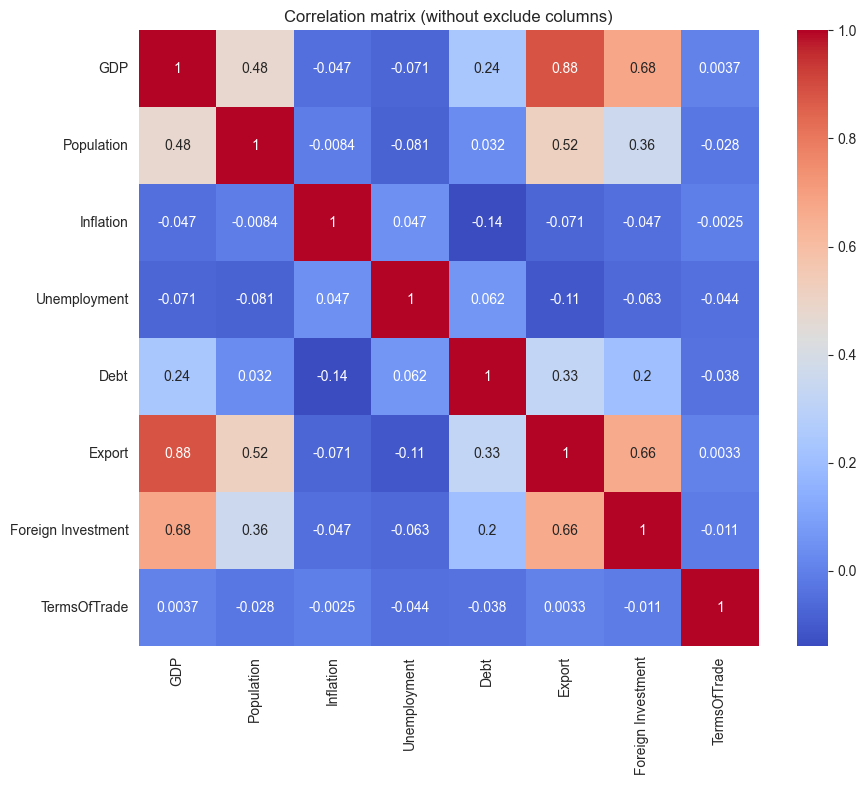

In [234]:
exclude = ['Country', 'Year']

corr_cols = [col for col in df.columns if col not in exclude]

plt.figure(figsize=(10, 8))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix (without exclude columns)')
plt.show()

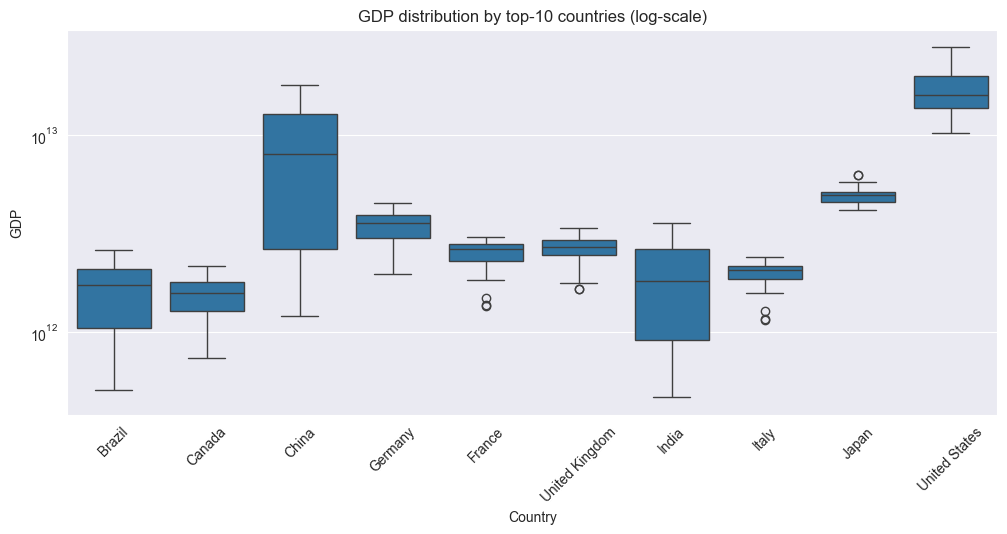

In [235]:
top10 = df.groupby('Country')['GDP'].mean().sort_values(ascending=False).head(10).index
plt.figure(figsize=(12, 5))
sns.boxplot(x='Country', y='GDP', data=df[df['Country'].isin(top10)])
plt.xticks(rotation=45)
plt.title('GDP distribution by top-10 countries (log-scale)')
plt.yscale('log')
plt.show()

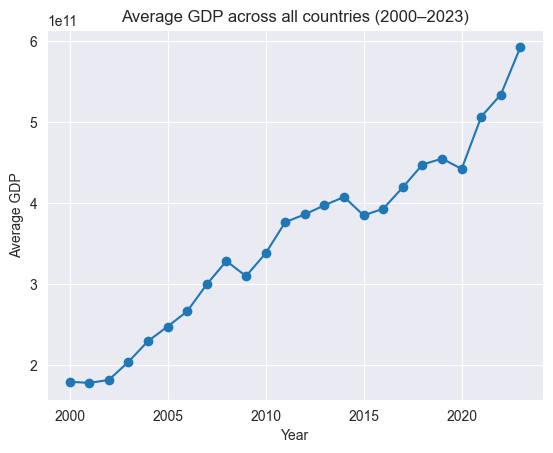

In [236]:
gdp_trend = df.groupby('Year')['GDP'].mean()
plt.plot(gdp_trend.index, gdp_trend.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average GDP')
plt.title('Average GDP across all countries (2000–2023)')
plt.show()


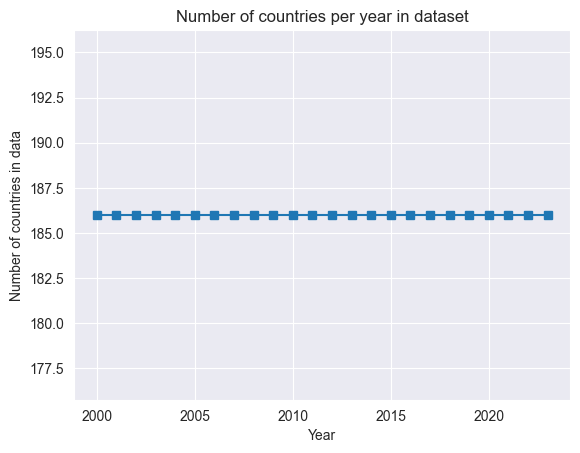

In [237]:
countries_by_year = df.groupby('Year')['Country'].nunique()
plt.plot(countries_by_year.index, countries_by_year.values, marker='s')
plt.xlabel('Year')
plt.ylabel('Number of countries in data')
plt.title('Number of countries per year in dataset')
plt.show()


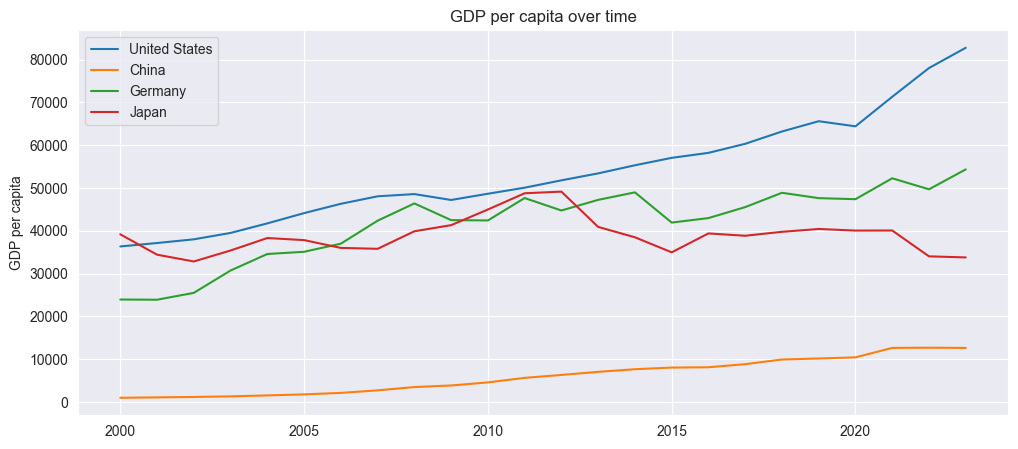

In [238]:
df['GDP_per_capita'] = df['GDP'] / df['Population']
plt.figure(figsize=(12, 5))
for country in ['United States', 'China', 'Germany', 'Japan']:
    plt.plot(df[df['Country'] == country]['Year'], df[df['Country'] == country]['GDP_per_capita'], label=country)
plt.legend()
plt.title('GDP per capita over time')
plt.ylabel('GDP per capita')
plt.show()

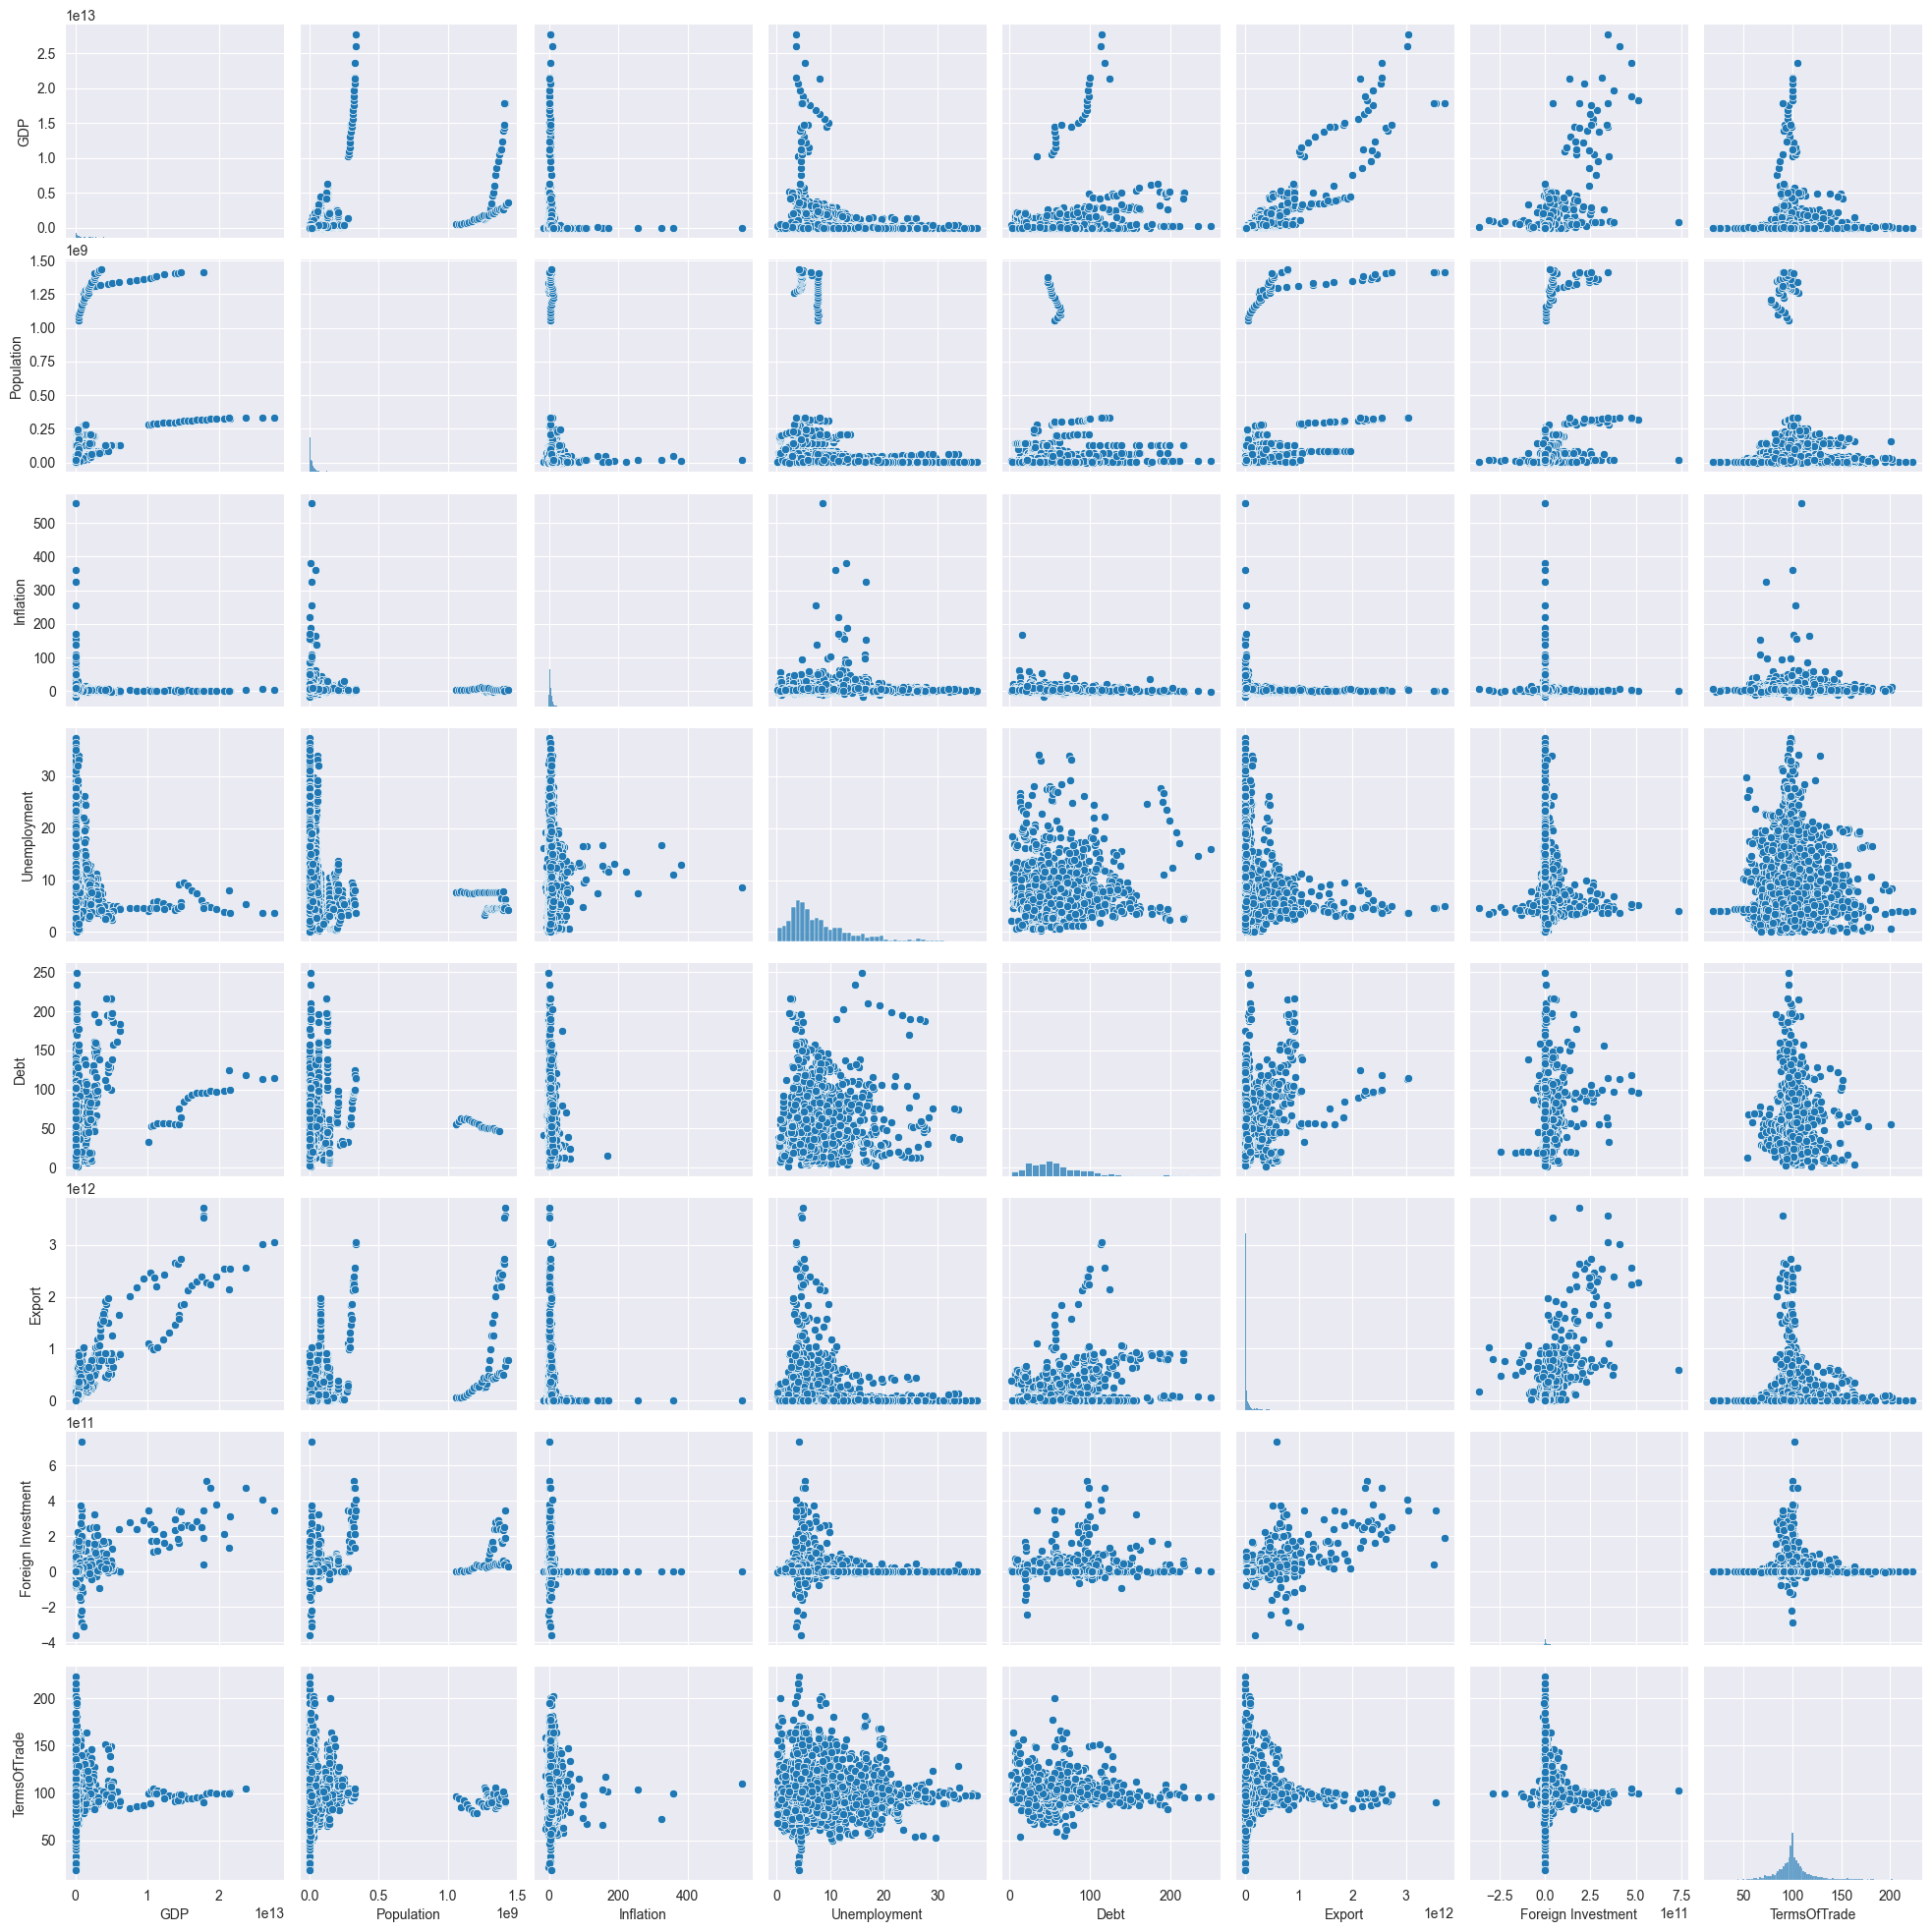

In [239]:
import seaborn as sns
sns.pairplot(df[corr_cols])
plt.show()



In [240]:
top_capita = df[df['Year']==2023].sort_values('GDP_per_capita', ascending=False).head(10)
print(top_capita[['Country', 'GDP_per_capita']])

              Country  GDP_per_capita
16907          Monaco   256580.515123
16902      Luxembourg   128678.189943
16785         Bermuda   125841.602522
16869         Ireland   103887.800388
16795     Switzerland    99564.710026
16810  Cayman Islands    97749.507896
16935          Norway    87925.094419
16966       Singapore    84734.255921
17009   United States    82769.412211
16958           Qatar    80195.874647


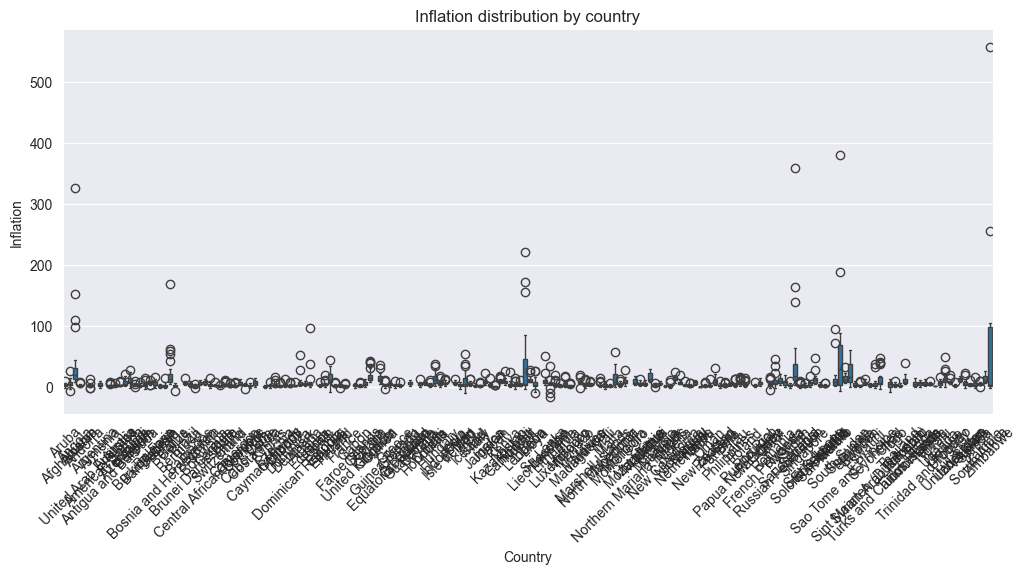

In [241]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Country', y='Inflation', data=df)
plt.xticks(rotation=45)
plt.title('Inflation distribution by country')
plt.show()

Data Preprocessing

In [242]:

df = df.drop(columns=['Debt'])

countries_before = df['Country'].nunique()
rows_before = df.shape[0]

for col in ['Inflation', 'Unemployment', 'Export', 'Foreign Investment', 'TermsOfTrade']:
    df[col] = df.groupby('Country')[col].transform(lambda x: x.fillna(x.mean()))  # или .median()

df = df.dropna(subset=['GDP'])

df = df.dropna()

countries_after = df['Country'].nunique()
rows_after = df.shape[0]

print("Missing values after full preprocessing:\n", df.isnull().sum())
print("Final shape:", df.shape)
print("Countries before dropna:", countries_before)
print("Countries after dropna:", countries_after)
print("Rows before dropna:", rows_before)
print("Rows after dropna:", rows_after)


Missing values after full preprocessing:
 Country               0
Year                  0
GDP                   0
Population            0
Inflation             0
Unemployment          0
Export                0
Foreign Investment    0
TermsOfTrade          0
GDP_per_capita        0
dtype: int64
Final shape: (3403, 10)
Countries before dropna: 186
Countries after dropna: 142
Rows before dropna: 4464
Rows after dropna: 3403


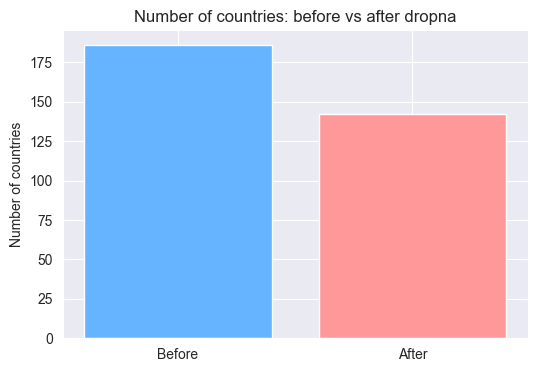

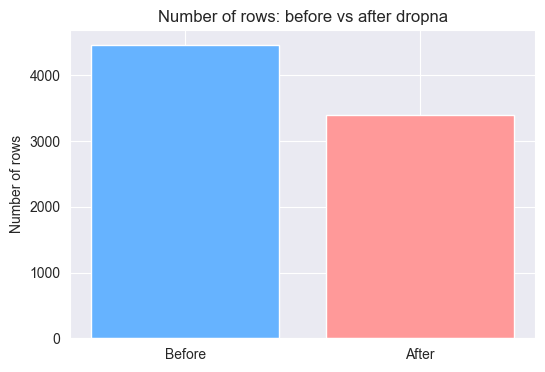

In [243]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(['Before', 'After'], [countries_before, countries_after], color=['#66b3ff', '#ff9999'])
plt.title('Number of countries: before vs after dropna')
plt.ylabel('Number of countries')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Before', 'After'], [rows_before, rows_after], color=['#66b3ff', '#ff9999'])
plt.title('Number of rows: before vs after dropna')
plt.ylabel('Number of rows')
plt.show()

# 8. (Optional) Сохраняем чистый датасет
df.to_csv('macro_preprocessed.csv', index=False)


Feature Engineering

In [244]:
df = df.sort_values(['Country', 'Year'])
df['GDP_growth'] = df.groupby('Country')['GDP'].pct_change(fill_method=None)


In [245]:
df['Population_growth'] = df.groupby('Country')['Population'].pct_change(fill_method=None)

In [246]:

df['Export_to_GDP'] = df['Export'] / df['GDP']



In [247]:
df['GDP_growth'] = df['GDP_growth'].fillna(0)
df['Population_growth'] = df['Population_growth'].fillna(0)
df['Population'] = df['Population'].astype(int)


In [248]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_features = [
    'Population', 'Inflation', 'Unemployment', 'Export',
    'Foreign Investment', 'TermsOfTrade',
    'GDP_growth', 'Population_growth', 'Export_to_GDP'
]
X_pca = df[pca_features].fillna(0)

scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X_pca)

pca = PCA(n_components=1)
df['PCA_1'] = pca.fit_transform(X_pca_scaled)[:, 0]

print('Explained variance (PCA_1):', pca.explained_variance_ratio_[0])


Explained variance (PCA_1): 0.23401380541409272


As an additional feature, the first PCA component on quantitative macroeconomic indicators was added. It aggregates the overall ‘economic strength’ and correlates with the latent macro factors of growth/decline.

In [249]:
df.head(30)

,Country,Year,GDP,Population,Inflation,Unemployment,Export,Foreign Investment,TermsOfTrade,GDP_per_capita,GDP_growth,Population_growth,Export_to_GDP,PCA_1
10642,Afghanistan,2000,3.521418e+09,20130327,5.877462,7.935,2.420057e+09,1.700000e+05,61.221057,174.930991,0.000000,0.000000,0.687239,-0.242398
10908,Afghanistan,2001,2.813572e+09,20284307,5.877462,7.953,2.420057e+09,6.800000e+05,72.363817,138.706822,-0.201012,0.007649,0.860137,-0.298463
11174,Afghanistan,2002,3.825701e+09,21378117,5.877462,7.930,2.420057e+09,5.000000e+07,71.320607,178.954088,0.359731,0.053924,0.632579,-0.837109
11440,Afghanistan,2003,4.520947e+09,22733049,5.877462,7.880,2.420057e+09,5.780000e+07,67.324304,198.871116,0.181730,0.063379,0.535299,-0.834333
11706,Afghanistan,2004,5.224897e+09,23560654,5.877462,7.899,2.420057e+09,1.869000e+08,74.730184,221.763654,0.155709,0.036405,0.463178,-0.595485
11972,Afghanistan,2005,6.203257e+09,24404567,12.686269,7.885,2.420057e+09,2.710000e+08,76.094588,254.184249,0.187250,0.035819,0.390127,-0.621740
12238,Afghanistan,2006,6.971758e+09,25424094,6.784597,7.914,2.420057e+09,2.380000e+08,81.220684,274.218554,0.123887,0.041776,0.347123,-0.629744
12504,Afghanistan,2007,9.747886e+09,25909852,8.680571,7.817,2.420057e+09,1.886900e+08,83.499343,376.223152,0.398196,0.019106,0.248265,-0.516373
12770,Afghanistan,2008,1.010930e+10,26482622,26.418664,7.878,2.420057e+09,4.603374e+07,84.699868,381.733238,0.037076,0.022106,0.239389,-0.517105
13036,Afghanistan,2009,1.241615e+10,27466101,-6.811161,7.754,2.420057e+09,5.610725e+07,90.087245,452.053705,0.228192,0.037137,0.194912,-0.550192


In [250]:
df.shape

(3403, 14)

In [251]:
from sklearn.preprocessing import StandardScaler

exclude = ['GDP', 'Country', 'Year']
feature_cols = [col for col in df.columns if col not in exclude]

train = df[df['Year'] <= 2018]
test = df[df['Year'] > 2018]

X_train = train[feature_cols]
y_train = train['GDP']
X_test = test[feature_cols]
y_test = test['GDP']


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)
print("Train years:", train['Year'].unique())
print("Test years:", test['Year'].unique())


Train shape: (2698, 11)
Test shape: (705, 11)
Train years: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]
Test years: [2019 2020 2021 2022 2023]


“To better reflect a real-world forecasting scenario and avoid data leakage, we split our data by years: 2000–2020 for training, 2021–2023 for testing. Standardization was performed on training data only, and the same scaling was applied to the test set.”

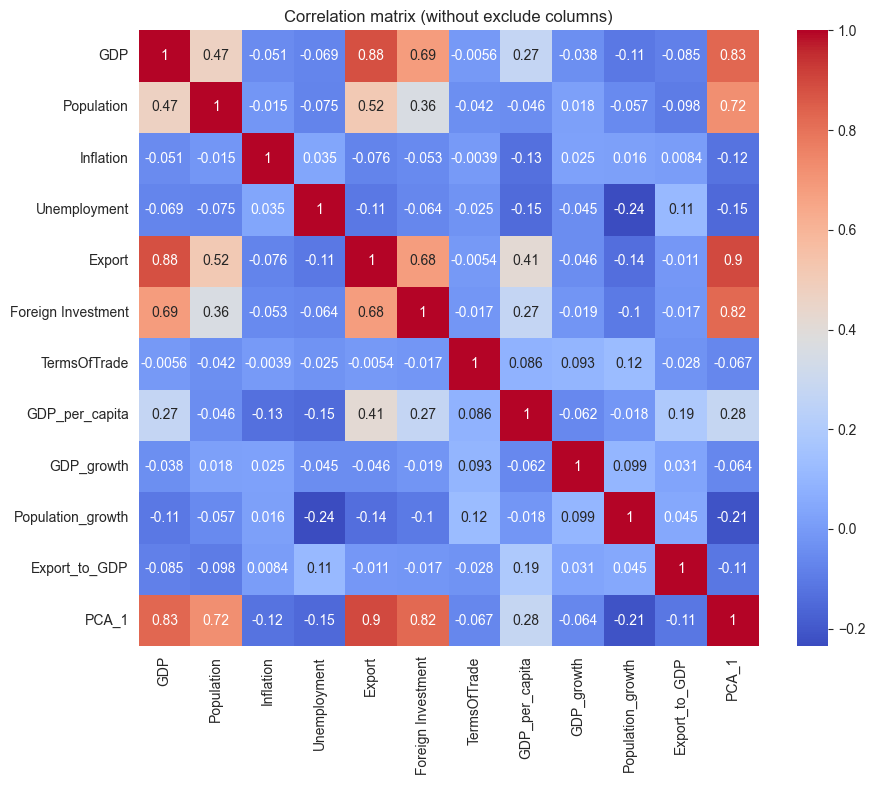

In [252]:
exclude = ['Country', 'Year']

corr_cols = [col for col in df.columns if col not in exclude]

plt.figure(figsize=(10, 8))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix (without exclude columns)')
plt.show()


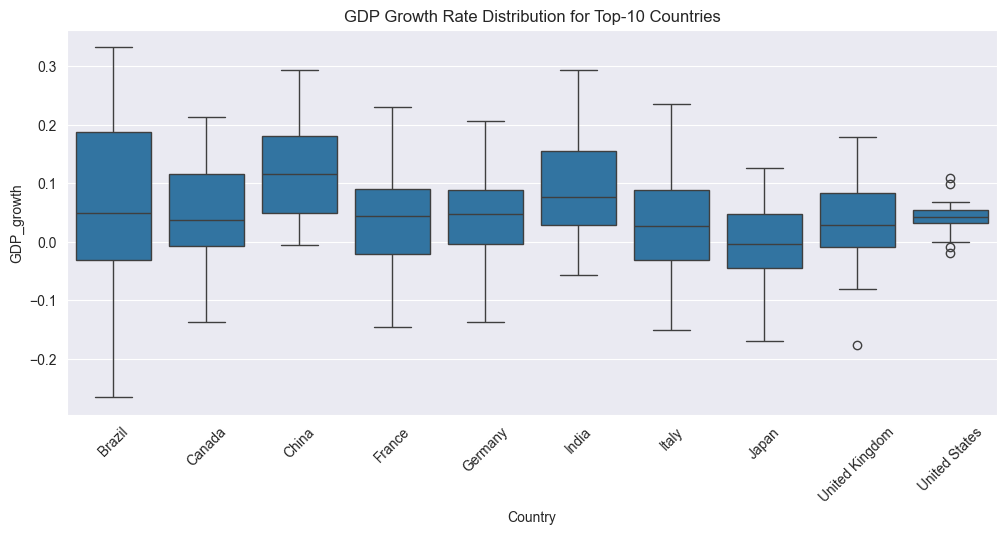

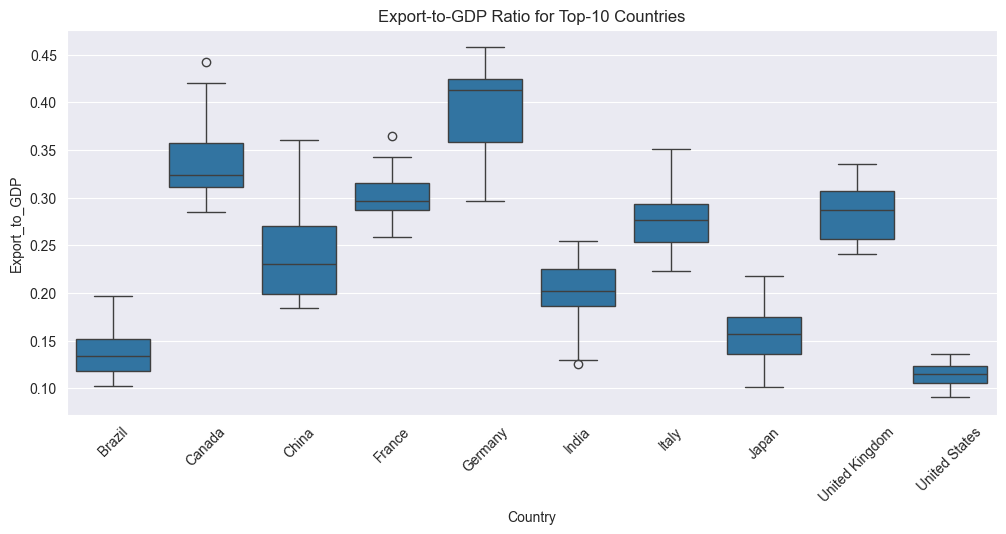

In [253]:
top10 = df.groupby('Country')['GDP'].mean().sort_values(ascending=False).head(10).index

plt.figure(figsize=(12, 5))
sns.boxplot(x='Country', y='GDP_growth', data=df[df['Country'].isin(top10)])
plt.title('GDP Growth Rate Distribution for Top-10 Countries')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x='Country', y='Export_to_GDP', data=df[df['Country'].isin(top10)])
plt.title('Export-to-GDP Ratio for Top-10 Countries')
plt.xticks(rotation=45)
plt.show()


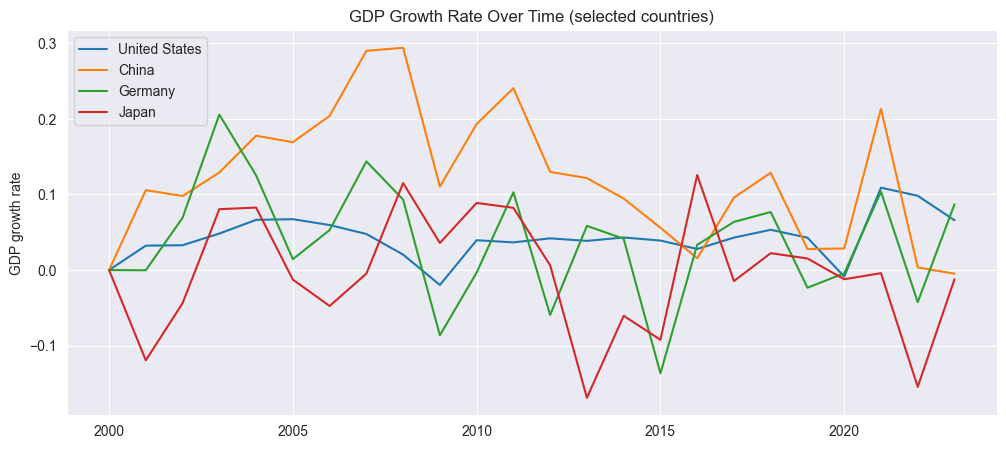

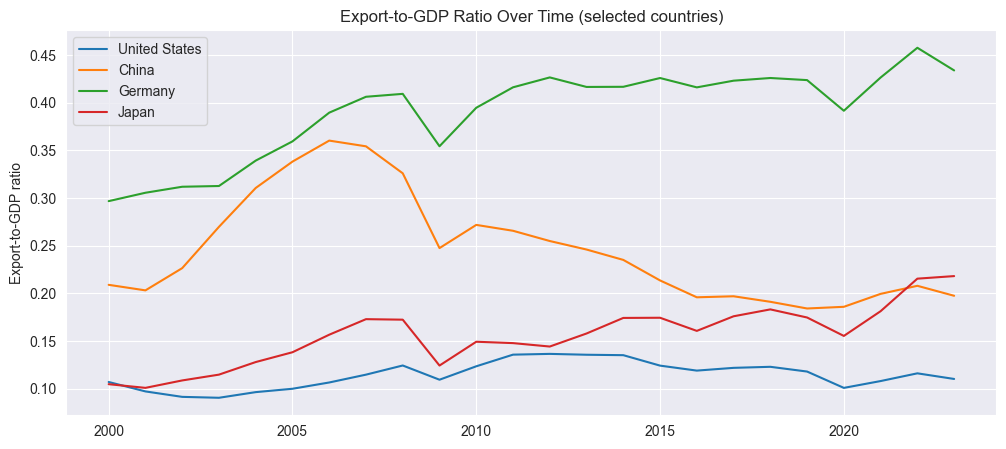

In [254]:
plt.figure(figsize=(12, 5))
for country in ['United States', 'China', 'Germany', 'Japan']:
    plt.plot(df[df['Country'] == country]['Year'],
             df[df['Country'] == country]['GDP_growth'],
             label=country)
plt.legend()
plt.title('GDP Growth Rate Over Time (selected countries)')
plt.ylabel('GDP growth rate')
plt.show()

plt.figure(figsize=(12, 5))
for country in ['United States', 'China', 'Germany', 'Japan']:
    plt.plot(df[df['Country'] == country]['Year'],
             df[df['Country'] == country]['Export_to_GDP'],
             label=country)
plt.legend()
plt.title('Export-to-GDP Ratio Over Time (selected countries)')
plt.ylabel('Export-to-GDP ratio')
plt.show()


Modelling

In [255]:
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
import numpy as np
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [256]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(),
    "MLP": MLPRegressor(random_state=42, max_iter=1000),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, random_state=42),
}
# Добавь VotingRegressor и StackingRegressor при желании
voting = VotingRegressor([
    ('lr', models["Linear Regression"]),
    ('ridge', models["Ridge Regression"]),
    ('rf', models["Random Forest"])
])
stacking = StackingRegressor([
    ('lr', models["Linear Regression"]),
    ('ridge', models["Ridge Regression"]),
    ('rf', models["Random Forest"]),
    ('gb', models["Gradient Boosting"])
])

models["Voting"] = voting
models["Stacking"] = stacking


In [257]:
scoring = {
    'RMSE': 'neg_root_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
}

results = []
for name, model in models.items():
    try:
        scores = cross_validate(model, X_train_scaled, y_train, cv=5, scoring=scoring, n_jobs=-1)
        results.append({
            'Model': name,
            'RMSE': -scores['test_RMSE'].mean(),
            'MAE': -scores['test_MAE'].mean(),
            'R2': scores['test_R2'].mean()
        })
    except Exception as e:
        print(f"Model {name} failed: {e}")

cv_df = pd.DataFrame(results)
print("Cross-validation results (train set):\n", cv_df.sort_values("RMSE"))


Cross-validation results (train set):
                 Model          RMSE           MAE            R2
10            XGBoost  7.295488e+11  1.592529e+11  6.683266e-01
11           LightGBM  7.604243e+11  1.762537e+11  5.948272e-01
5   Gradient Boosting  8.054753e+11  1.955636e+11  5.840933e-01
12             Voting  8.932589e+11  2.830178e+11 -3.616010e-02
4       Random Forest  8.993807e+11  2.011194e+11  3.742738e-01
3          ElasticNet  9.048603e+11  3.066152e+11 -5.462488e-01
1    Ridge Regression  9.354637e+11  3.359219e+11 -5.362934e-01
2               Lasso  9.358745e+11  3.362793e+11 -5.360832e-01
0   Linear Regression  9.358745e+11  3.362793e+11 -5.360832e-01
7                 KNN  9.760684e+11  2.442190e+11 -1.347572e-02
6            AdaBoost  1.033110e+12  5.262947e+11 -4.360389e-02
8                 SVR  1.283932e+12  3.859069e+11 -1.277328e-01
9                 MLP  1.293804e+12  3.952739e+11 -1.636872e-01
13           Stacking  8.599591e+25  5.067708e+25 -1.853740e+28


In [258]:
test_results = []
for name, model in models.items():
    try:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        test_results.append({'Model': name, 'Test RMSE': rmse, 'Test MAE': mae, 'Test R2': r2})
    except Exception as e:
        print(f"Model {name} failed on test: {e}")

test_df = pd.DataFrame(test_results)
print("\nTest set results:\n", test_df.sort_values("Test RMSE"))


C:\Users\falco\Desktop\ML Project\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.295e+26, tolerance: 6.392e+23
  model = cd_fast.enet_coordinate_descent(
C:\Users\falco\Desktop\ML Project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\falco\Desktop\ML Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 2698, number of used features: 11
[LightGBM] [Info] Start training from score 395220234227.605652

Test set results:
                 Model     Test RMSE      Test MAE       Test R2
5   Gradient Boosting  5.803981e+11  1.070086e+11  9.473277e-01
10            XGBoost  5.914542e+11  1.055885e+11  9.453019e-01
4       Random Forest  6.403122e+11  1.072859e+11  9.358918e-01
11           LightGBM  6.655697e+11  1.235994e+11  9.307344e-01
6            AdaBoost  7.694000e+11  2.421129e+11  9.074376e-01
7                 KNN  7.976311e+11  1.787862e+11  9.005203e-01
12             Voting  8.836841e+11  2.683775e+11  8.778976e-01
1    Ridge Regression  1.088772e+12  3.600158e+11  8.146451e-01
2               Lasso  1.088786e+12  3.603117e+11  8

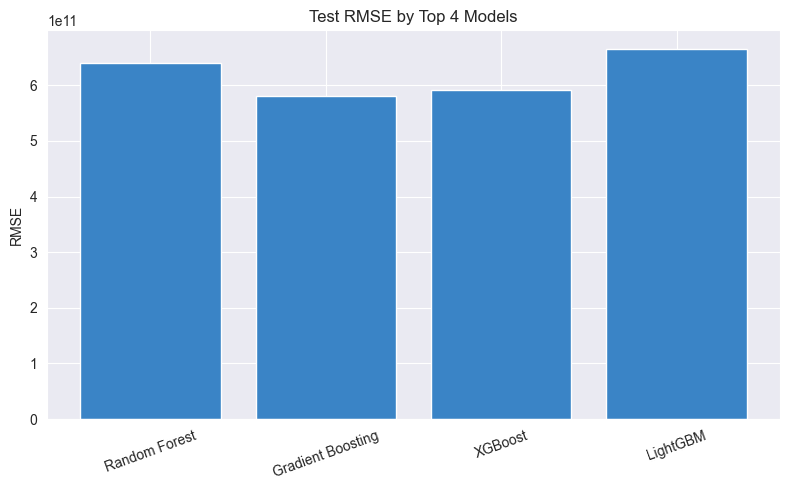

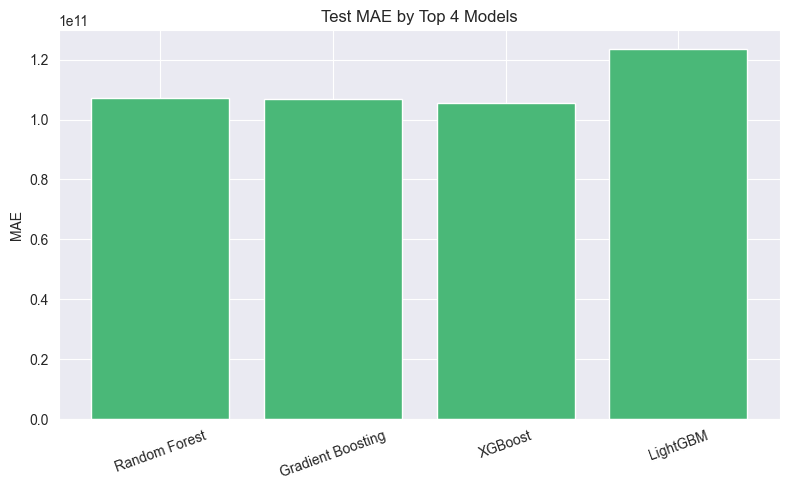

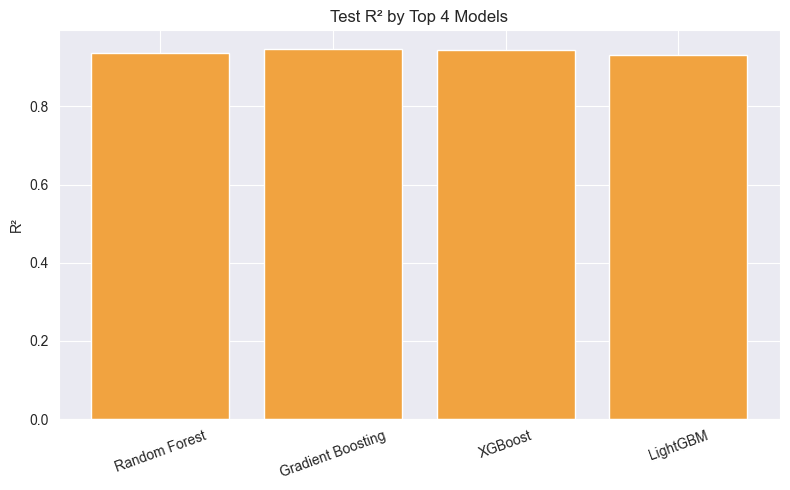

In [259]:
import matplotlib.pyplot as plt

# Укажи явно имена топ-4 моделей (из test_df)
top_models = ["Gradient Boosting", "XGBoost", "Random Forest", "LightGBM"]

# Фильтруем test_df
test_df_top4 = test_df[test_df['Model'].isin(top_models)]

# 1. Barplot RMSE
plt.figure(figsize=(8,5))
plt.bar(test_df_top4['Model'], test_df_top4['Test RMSE'], color='#3A84C6')
plt.title('Test RMSE by Top 4 Models')
plt.ylabel('RMSE')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# 2. Barplot MAE
plt.figure(figsize=(8,5))
plt.bar(test_df_top4['Model'], test_df_top4['Test MAE'], color='#4AB878')
plt.title('Test MAE by Top 4 Models')
plt.ylabel('MAE')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# 3. Barplot R2
plt.figure(figsize=(8,5))
plt.bar(test_df_top4['Model'], test_df_top4['Test R2'], color='#F1A340')
plt.title('Test R² by Top 4 Models')
plt.ylabel('R²')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


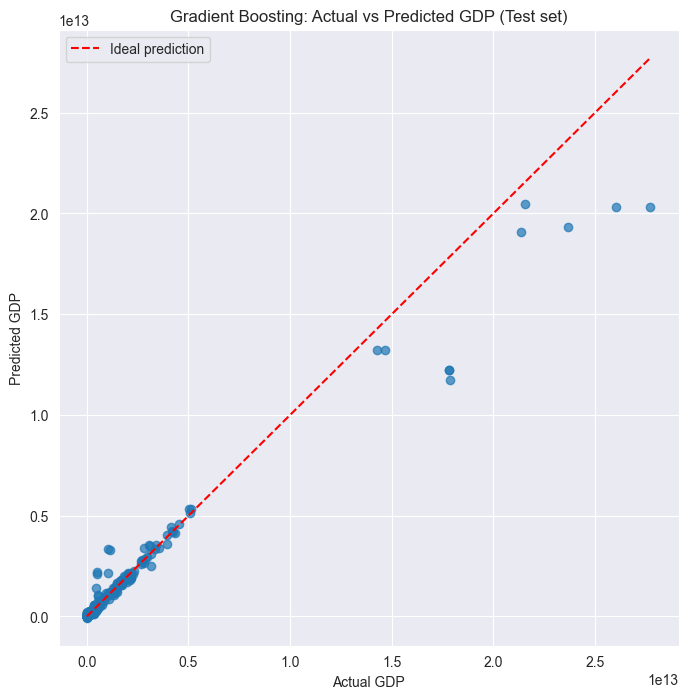

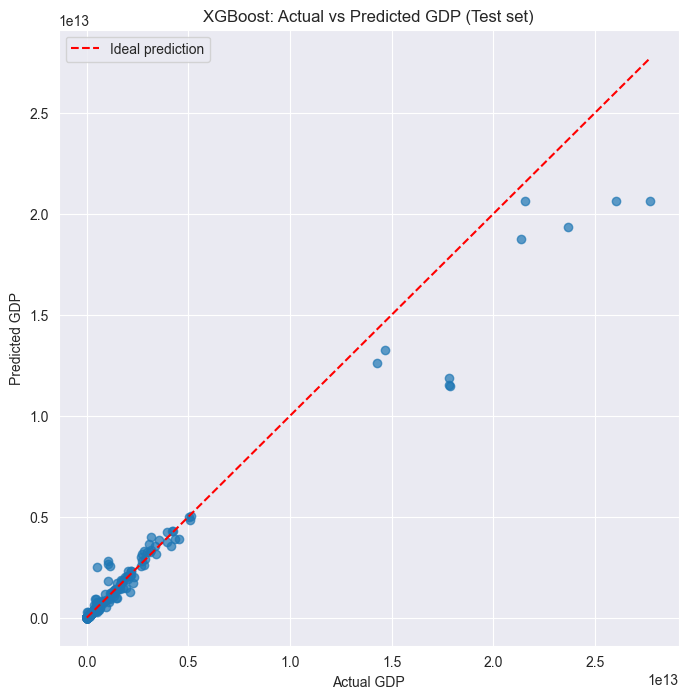

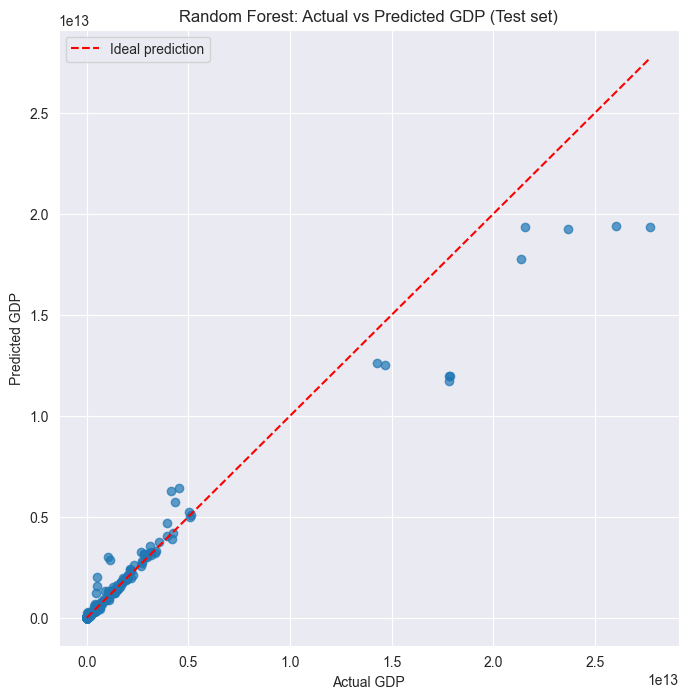

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 2698, number of used features: 11
[LightGBM] [Info] Start training from score 395220234227.605652


C:\Users\falco\Desktop\ML Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


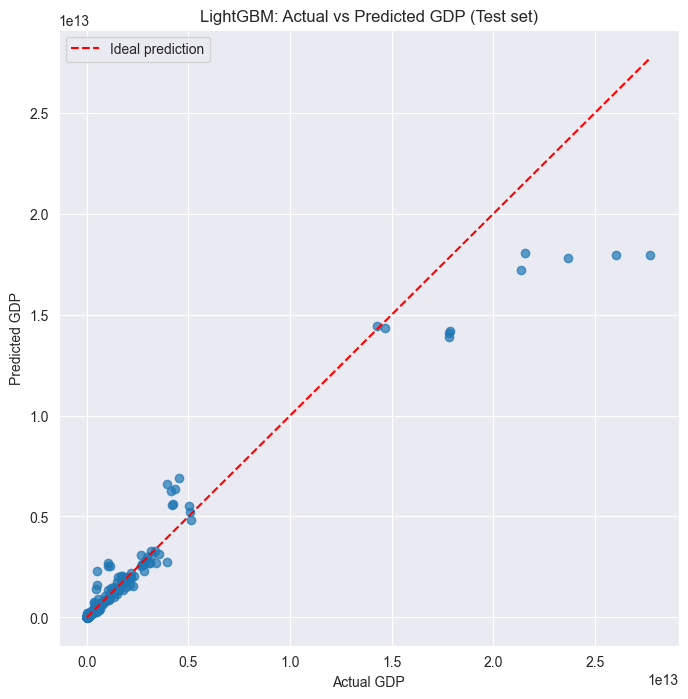

In [260]:
import matplotlib.pyplot as plt

# Предполагаем, что у тебя уже обучены эти модели и есть X_test_scaled, y_test

# 1. Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_gb, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal prediction')
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Gradient Boosting: Actual vs Predicted GDP (Test set)')
plt.legend()
plt.show()

# 2. XGBoost
import xgboost as xgb
xgbr = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgbr.fit(X_train_scaled, y_train)
y_pred_xgb = xgbr.predict(X_test_scaled)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_xgb, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal prediction')
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('XGBoost: Actual vs Predicted GDP (Test set)')
plt.legend()
plt.show()

# 3. Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal prediction')
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Random Forest: Actual vs Predicted GDP (Test set)')
plt.legend()
plt.show()

# 4. LightGBM
import lightgbm as lgb
lgbm = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgbm.fit(X_train_scaled, y_train)
y_pred_lgb = lgbm.predict(X_test_scaled)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_lgb, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal prediction')
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('LightGBM: Actual vs Predicted GDP (Test set)')
plt.legend()
plt.show()


In [261]:

gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

test_gb = test.copy()
test_gb['Predicted_GDP'] = y_pred_gb
test_gb['Actual_GDP'] = y_test.values



In [262]:
print(test_gb.groupby('Country')[['Predicted_GDP', 'Actual_GDP']].mean())


             Predicted_GDP    Actual_GDP
Country                                 
Afghanistan   4.018748e+10  1.694913e+10
Albania       2.486680e+10  1.828460e+10
Algeria       2.054815e+11  2.035658e+11
Angola        8.362760e+10  7.502581e+10
Armenia       1.764688e+10  1.674783e+10
...                    ...           ...
Uzbekistan    8.909697e+10  8.055293e+10
Vanuatu       8.986214e+09  9.889748e+08
Viet Nam      4.879708e+11  3.774994e+11
Zambia        2.198240e+10  2.405692e+10
Zimbabwe      1.726795e+10  2.956940e+10

[142 rows x 2 columns]


In [263]:
test_gb[test_gb['Country']=='Kazakhstan']

,Country,Year,GDP,Population,Inflation,Unemployment,Export,Foreign Investment,TermsOfTrade,GDP_per_capita,GDP_growth,Population_growth,Export_to_GDP,PCA_1,Predicted_GDP,Actual_GDP
15814,Kazakhstan,2019,1.816672e+11,19209555,5.333561,4.800,6.619768e+10,3.730856e+09,113.486098,9457.126147,0.012977,0.014622,0.364390,-0.225415,1.759529e+11,1.816672e+11
16080,Kazakhstan,2020,1.710824e+11,19482117,6.718155,4.890,5.222958e+10,7.205989e+09,92.005387,8781.507978,-0.058265,0.014189,0.305289,-0.126522,1.714196e+11,1.710824e+11
16346,Kazakhstan,2021,1.971123e+11,19743603,8.041471,5.546,6.631815e+10,4.566615e+09,133.307708,9983.601036,0.152148,0.013422,0.336449,-0.317224,1.787659e+11,1.971123e+11
16612,Kazakhstan,2022,2.254963e+11,20034609,15.027864,4.860,9.373659e+10,5.077497e+09,110.126246,11255.339644,0.144000,0.014739,0.415690,-0.238835,2.240328e+11,2.254963e+11
16878,Kazakhstan,2023,2.626419e+11,20330104,14.724990,4.821,9.036013e+10,5.437312e+09,110.126246,12918.866135,0.164728,0.014749,0.344043,-0.233974,2.554480e+11,2.626419e+11


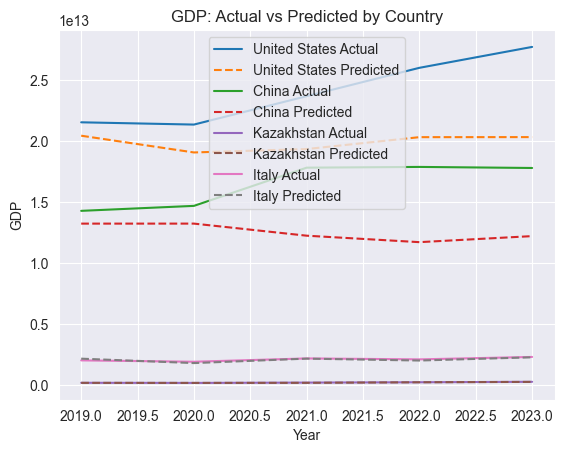

In [264]:
for country in ['United States','China','Kazakhstan','Italy']:
    data = test_gb[test_gb['Country'] == country].sort_values('Year')
    plt.plot(data['Year'], data['Actual_GDP'], label=f'{country} Actual')
    plt.plot(data['Year'], data['Predicted_GDP'], '--', label=f'{country} Predicted')
plt.legend()
plt.title('GDP: Actual vs Predicted by Country')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()


Model Tuning

In [265]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# 1. Random Forest (пример как у тебя)
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 12, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, param_grid=rf_param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)
rf_best = rf_grid.best_estimator_

# 2. Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 8],
    'learning_rate': [0.05, 0.1, 0.2]
}
gb = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(gb, param_grid=gb_param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
gb_grid.fit(X_train_scaled, y_train)
gb_best = gb_grid.best_estimator_

# 3. XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1]
}
xgbr = xgb.XGBRegressor(random_state=42, verbosity=0)
xgb_grid = GridSearchCV(xgbr, param_grid=xgb_param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train_scaled, y_train)
xgb_best = xgb_grid.best_estimator_

# 4. LightGBM
lgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 8, -1],
    'learning_rate': [0.05, 0.1, 0.2]
}
lgbm = lgb.LGBMRegressor(random_state=42)
lgb_grid = GridSearchCV(lgbm, param_grid=lgb_param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
lgb_grid.fit(X_train_scaled, y_train)
lgb_best = lgb_grid.best_estimator_


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 2698, number of used features: 11
[LightGBM] [Info] Start training from score 395220234227.605652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

In [266]:
# Для каждой модели: считаем метрики на тесте для untuned и tuned версий
models_untuned = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42, verbosity=0),
    'LightGBM': lgb.LGBMRegressor(random_state=42)
}
models_tuned = {
    'Random Forest (tuned)': rf_best,
    'Gradient Boosting (tuned)': gb_best,
    'XGBoost (tuned)': xgb_best,
    'LightGBM (tuned)': lgb_best
}

results = []
for name, model in {**models_untuned, **models_tuned}.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'Test RMSE': rmse, 'Test MAE': mae, 'Test R2': r2})

compare_df = pd.DataFrame(results)
# Добавим Type для barplot'а
compare_df['Type'] = compare_df['Model'].apply(lambda x: 'Tuned' if '(tuned)' in x else 'Untuned')
# Сгруппируем названия для баров
model_map = {
    'Random Forest (tuned)': 'Random Forest',
    'Gradient Boosting (tuned)': 'Gradient Boosting',
    'XGBoost (tuned)': 'XGBoost',
    'LightGBM (tuned)': 'LightGBM'
}
compare_df['Model'] = compare_df['Model'].replace(model_map)
order = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM']


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 2698, number of used features: 11
[LightGBM] [Info] Start training from score 395220234227.605652


C:\Users\falco\Desktop\ML Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 2698, number of used features: 11
[LightGBM] [Info] Start training from score 395220234227.605652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

C:\Users\falco\Desktop\ML Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [267]:
results

[{'Model': 'Random Forest',
  'Test RMSE': np.float64(640312206282.1671),
  'Test MAE': 107285877134.28156,
  'Test R2': 0.9358917639556763},
 {'Model': 'Gradient Boosting',
  'Test RMSE': np.float64(580398105328.8651),
  'Test MAE': 107008624623.89238,
  'Test R2': 0.9473277054696501},
 {'Model': 'XGBoost',
  'Test RMSE': np.float64(591454217422.9348),
  'Test MAE': 105588522146.64096,
  'Test R2': 0.9453018634078615},
 {'Model': 'LightGBM',
  'Test RMSE': np.float64(665569700996.8478),
  'Test MAE': 123599428534.27693,
  'Test R2': 0.9307344396569074},
 {'Model': 'Random Forest (tuned)',
  'Test RMSE': np.float64(921719316536.4713),
  'Test MAE': 153627338623.9239,
  'Test R2': 0.8671603741130172},
 {'Model': 'Gradient Boosting (tuned)',
  'Test RMSE': np.float64(548541147079.3558),
  'Test MAE': 92736573042.38254,
  'Test R2': 0.9529511853458804},
 {'Model': 'XGBoost (tuned)',
  'Test RMSE': np.float64(628098109072.4539),
  'Test MAE': 112782482564.47148,
  'Test R2': 0.938314194885

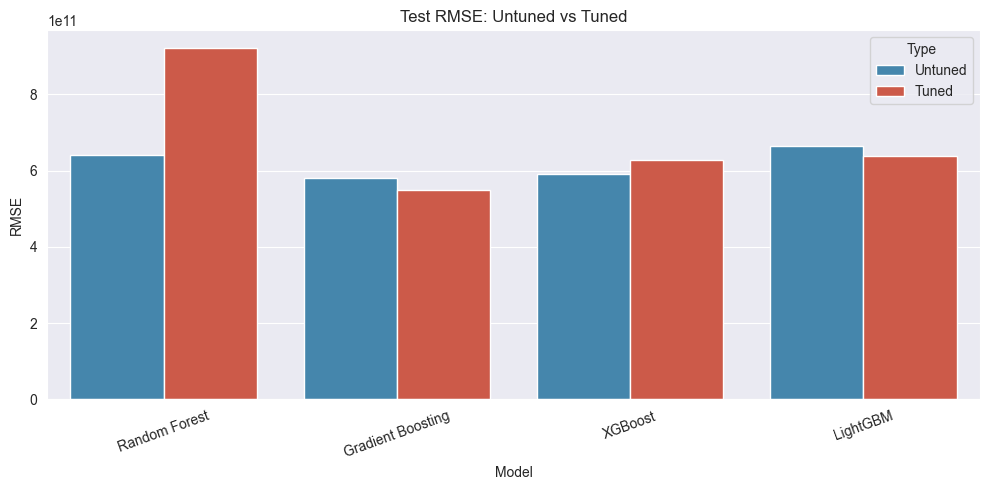

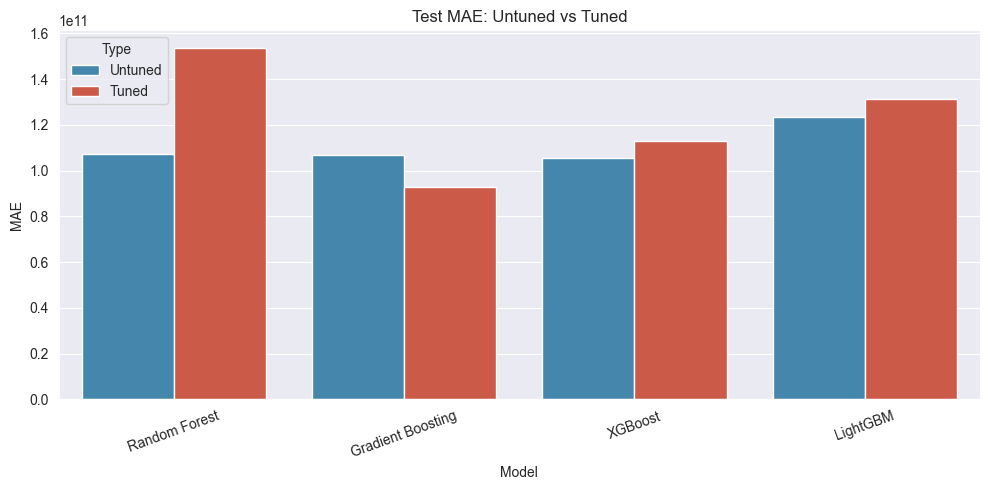

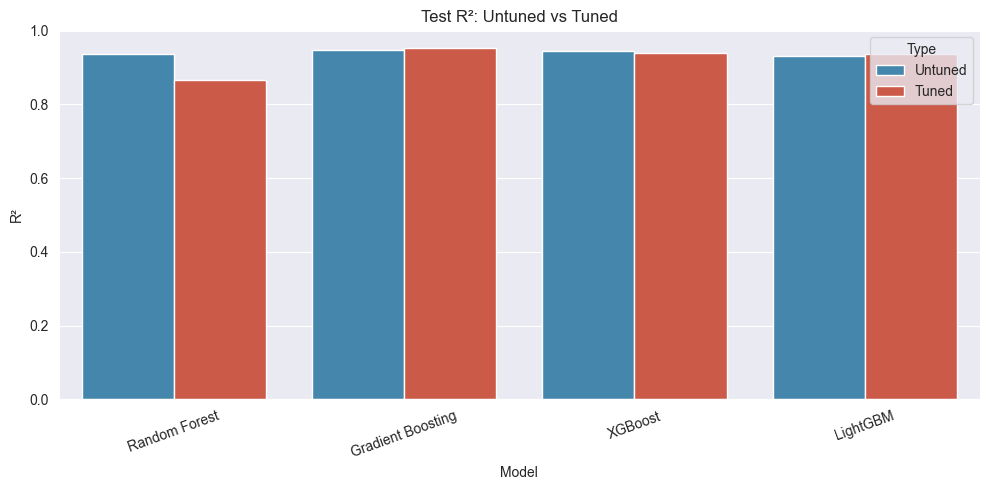

In [268]:
import seaborn as sns
def plot_grouped_bar(compare_df, metric_col, title=None, ylabel=None):
    plt.figure(figsize=(10,5))
    sns.barplot(
        data=compare_df,
        x='Model',
        y=metric_col,
        hue='Type',
        order=order,
        palette=['#348ABD', '#E24A33']
    )
    plt.title(title if title else f'{metric_col}: Untuned vs Tuned')
    plt.ylabel(ylabel if ylabel else metric_col)
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()

plot_grouped_bar(compare_df, 'Test RMSE', title='Test RMSE: Untuned vs Tuned', ylabel='RMSE')
plot_grouped_bar(compare_df, 'Test MAE', title='Test MAE: Untuned vs Tuned', ylabel='MAE')
plot_grouped_bar(compare_df, 'Test R2',  title='Test R²: Untuned vs Tuned', ylabel='R²')


A fair evaluation on the holdout test set shows that the best prediction quality is achieved by a tuned Gradient Boosting model, which outperforms both untuned ensembles and other advanced regressors (XGBoost, LightGBM, Random Forest). Interestingly, while tuning brings moderate improvement to boosting algorithms, Random Forest performed worse after hyperparameter optimization, likely due to overfitting on the training data.

This highlights two key lessons for data mining:
(1) Modern boosting models (Gradient Boosting, XGBoost) are especially effective for macroeconomic tabular data;
(2) Hyperparameter tuning does not guarantee better generalization, and in some cases default model settings are more robust—particularly for Random Forest.


Interpretation


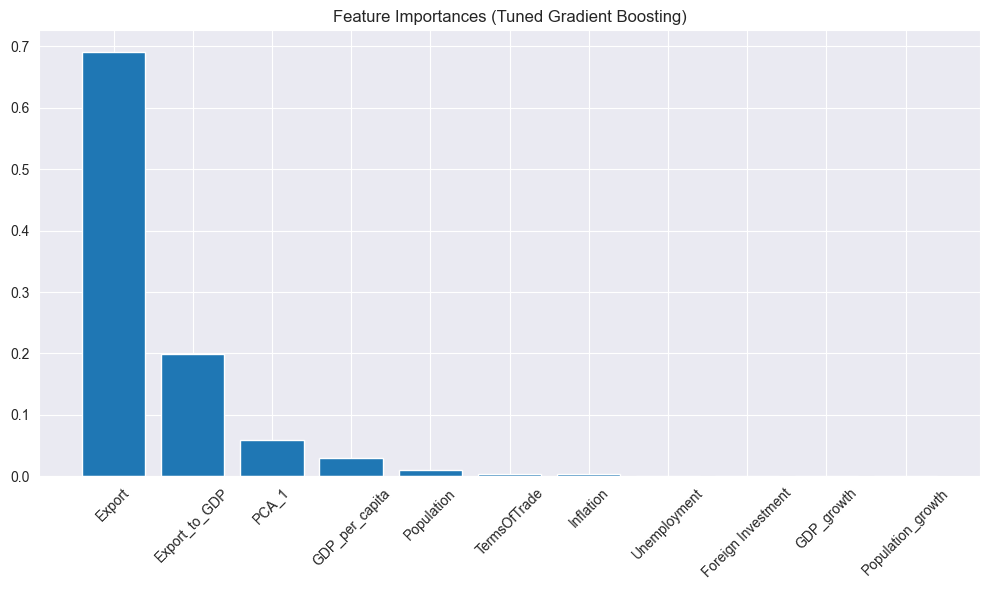

               Feature  Importance
3               Export    0.691365
9        Export_to_GDP    0.199166
10               PCA_1    0.058396
6       GDP_per_capita    0.030538
0           Population    0.009697
5         TermsOfTrade    0.004431
1            Inflation    0.004190
2         Unemployment    0.001228
4   Foreign Investment    0.000583
7           GDP_growth    0.000327
8    Population_growth    0.000079


In [269]:
import matplotlib.pyplot as plt
import pandas as pd

# gb_best — это твоя tuned GradientBoostingRegressor из GridSearchCV
importances = gb_best.feature_importances_
feature_names = X_train.columns  # или feature_cols, если используешь список

fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(fi_df['Feature'], fi_df['Importance'])
plt.title('Feature Importances (Tuned Gradient Boosting)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(fi_df)


Feature importance analysis shows that export-related indicators—specifically, total export and the export-to-GDP ratio—are the most influential drivers of GDP prediction in the current model. The first principal component (PCA_1), which aggregates information from multiple macroeconomic indicators, also has a significant impact. Demographic variables, foreign investment, and inflation play a much smaller role, while terms of trade and growth rates show only marginal contributions.

This result highlights the key role of external trade and economic structure in shaping a country’s GDP dynamics, as well as the value of combining multiple indicators via dimensionality reduction (PCA).

In [270]:
# Обучаем на всём df до 2023 включительно
full_train = df[df['Year'] <= 2023]
X_full = full_train[feature_cols]
y_full = full_train['GDP']

# Скейлим на всём train (важно: fit только на train!)
scaler_final = StandardScaler()
X_full_scaled = scaler_final.fit_transform(X_full)

gb_best.fit(X_full_scaled, y_full)


GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=200,
                          random_state=42)

Future

In [297]:
def forecast_population_growth(df, years_to_predict):
    forecasts = []
    for country in df['Country'].unique():
        country_df = df[df['Country'] == country].sort_values('Year')
        pop_values = country_df['Population'].values
        year_values = country_df['Year'].values

        if len(pop_values) < 5:
            continue

        avg_growth = np.diff(pop_values[-5:]).mean()
        last_year = year_values[-1]
        last_value = pop_values[-1]

        for year in years_to_predict:
            y_pred = last_value + avg_growth * (year - last_year)
            forecasts.append({'Country': country, 'Year': year, 'Population': max(0, round(y_pred))})
    return pd.DataFrame(forecasts)


In [298]:
def forecast_flat_median(df, feature, years_to_predict, n_years=5):
    forecasts = []
    for country in df['Country'].unique():
        country_df = df[df['Country'] == country].sort_values('Year')
        y = country_df[feature].dropna().values

        if len(y) < 2:
            continue

        median_val = np.median(y[-n_years:])
        for year in years_to_predict:
            forecasts.append({'Country': country, 'Year': year, feature: median_val})
    return pd.DataFrame(forecasts)


In [299]:
def forecast_growth(df, feature, years_to_predict, n_years=5):
    forecasts = []
    for country in df['Country'].unique():
        df_country = df[df['Country'] == country].sort_values('Year')
        y = df_country[feature].dropna().values
        x = df_country['Year'].values

        if len(y) < n_years:
            continue

        avg_growth = np.diff(y[-n_years:]).mean()
        last_year = x[-1]
        last_value = y[-1]

        for year in years_to_predict:
            y_pred = last_value + avg_growth * (year - last_year)
            forecasts.append({'Country': country, 'Year': year, feature: max(0, y_pred)})
    return pd.DataFrame(forecasts)


In [271]:
def smart_forecast_feature(df, feature, years_to_predict, kind='trend'):
    forecasts = []
    for country in df['Country'].unique():
        country_data = df[df['Country'] == country].sort_values('Year')
        y = country_data[feature].values
        x = country_data['Year'].values.reshape(-1, 1)
        if len(y) < 2 or np.isnan(y).all():
            continue

        if kind == 'trend':
            model = LinearRegression()
            model.fit(x, y)
            for year in years_to_predict:
                y_pred = model.predict(np.array([[year]]))[0]
                if feature.lower().startswith('pop'):
                    y_pred = max(0, int(round(y_pred)))
                forecasts.append({'Country': country, 'Year': year, feature: y_pred})

        elif kind == 'median':
            median_val = np.median(y[-5:])  # медиана последних 5 лет
            for year in years_to_predict:
                y_pred = median_val
                forecasts.append({'Country': country, 'Year': year, feature: y_pred})
    return pd.DataFrame(forecasts)



In [272]:
from sklearn.ensemble import GradientBoostingRegressor

def gb_forecast_feature(df, feature, years_to_predict, gb_model=None):

    forecasts = []
    for country in df['Country'].unique():
        country_data = df[df['Country'] == country].sort_values('Year')
        X = country_data['Year'].values.reshape(-1, 1)
        y = country_data[feature].values
        if len(y) < 3 or np.isnan(y).all():
            continue
        model = gb_model if gb_model is not None else GradientBoostingRegressor()
        model.fit(X, y)
        for year in years_to_predict:
            y_pred = model.predict([[year]])[0]
            if feature.lower().startswith('pop'):
                y_pred = max(0, int(round(y_pred)))
            forecasts.append({'Country': country, 'Year': year, feature: y_pred})
    return pd.DataFrame(forecasts)


In [300]:
future_years = np.arange(2024, 2031)

# 1. Population → прирост
pop_future = forecast_population_growth(df[['Country', 'Year', 'Population']], future_years)

# 2. Export → прирост
export_future = forecast_growth(df[['Country', 'Year', 'Export']], 'Export', future_years)

# 3. FDI → прирост
fdi_future = forecast_growth(df[['Country', 'Year', 'Foreign Investment']], 'Foreign Investment', future_years)

# 4. Terms of Trade → flat median
terms_future = forecast_flat_median(df[['Country', 'Year', 'TermsOfTrade']], 'TermsOfTrade', future_years)

# 5. Inflation → flat median
inflation_future = forecast_flat_median(df[['Country', 'Year', 'Inflation']], 'Inflation', future_years)

# 6. Unemployment → flat median
unemployment_future = forecast_flat_median(df[['Country', 'Year', 'Unemployment']], 'Unemployment', future_years)


In [301]:
print(pop_future.head(20))



        Country  Year  Population
0   Afghanistan  2024    42354421
1   Afghanistan  2025    43254081
2   Afghanistan  2026    44153741
3   Afghanistan  2027    45053401
4   Afghanistan  2028    45953061
5   Afghanistan  2029    46852721
6   Afghanistan  2030    47752381
7       Albania  2024     2718917
8       Albania  2025     2691862
9       Albania  2026     2664808
10      Albania  2027     2637753
11      Albania  2028     2610698
12      Albania  2029     2583644
13      Albania  2030     2556589
14      Algeria  2024    46881637
15      Algeria  2025    47599056
16      Algeria  2026    48316474
17      Algeria  2027    49033892
18      Algeria  2028    49751310
19      Algeria  2029    50468728


In [302]:
export_future.head(20)

,Country,Year,Export
0,Afghanistan,2024,3.008571e+09
1,Afghanistan,2025,3.126273e+09
2,Afghanistan,2026,3.243976e+09
3,Afghanistan,2027,3.361679e+09
4,Afghanistan,2028,3.479381e+09
5,Afghanistan,2029,3.597084e+09
6,Afghanistan,2030,3.714787e+09
7,Albania,2024,1.017531e+10
8,Albania,2025,1.124609e+10
9,Albania,2026,1.231687e+10


In [303]:
from functools import reduce

dfs = [pop_future, inflation_future, unemployment_future, export_future,fdi_future, terms_future]
future = reduce(lambda left, right: pd.merge(left, right, on=['Country', 'Year'], how='outer'), dfs)
print(future.head())


       Country  Year  Population  Inflation  Unemployment        Export  \
0  Afghanistan  2024    42354421   5.133203        11.994  3.008571e+09   
1  Afghanistan  2025    43254081   5.133203        11.994  3.126273e+09   
2  Afghanistan  2026    44153741   5.133203        11.994  3.243976e+09   
3  Afghanistan  2027    45053401   5.133203        11.994  3.361679e+09   
4  Afghanistan  2028    45953061   5.133203        11.994  3.479381e+09   

   Foreign Investment  TermsOfTrade  
0        1.064853e+08    106.029777  
1        1.231015e+08    106.029777  
2        1.397176e+08    106.029777  
3        1.563338e+08    106.029777  
4        1.729499e+08    106.029777  


In [304]:
future.shape

(994, 8)

In [305]:
feature_cols = ['Population', 'Inflation', 'Unemployment', 'Export','Foreign Investment', 'TermsOfTrade']


X_full = full_train[feature_cols]
scaler_final = StandardScaler()
X_full_scaled = scaler_final.fit_transform(X_full)
gb_best.fit(X_full_scaled, y_full)


GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=200,
                          random_state=42)

In [306]:
X_future = future[feature_cols]
X_future_scaled = scaler_final.transform(X_future)
future['Predicted_GDP'] = gb_best.predict(X_future_scaled)


In [307]:
future

,Country,Year,Population,Inflation,Unemployment,Export,Foreign Investment,TermsOfTrade,Predicted_GDP
0,Afghanistan,2024,42354421,5.133203,11.994,3.008571e+09,1.064853e+08,106.029777,4.787864e+10
1,Afghanistan,2025,43254081,5.133203,11.994,3.126273e+09,1.231015e+08,106.029777,4.932769e+10
2,Afghanistan,2026,44153741,5.133203,11.994,3.243976e+09,1.397176e+08,106.029777,5.364882e+10
3,Afghanistan,2027,45053401,5.133203,11.994,3.361679e+09,1.563338e+08,106.029777,4.947108e+10
4,Afghanistan,2028,45953061,5.133203,11.994,3.479381e+09,1.729499e+08,106.029777,4.947108e+10
...,...,...,...,...,...,...,...,...,...
989,Zimbabwe,2026,17142912,104.705171,8.759,7.990095e+09,7.891528e+08,97.836232,2.805637e+10
990,Zimbabwe,2027,17410276,104.705171,8.759,8.119221e+09,8.662460e+08,97.836232,2.805637e+10
991,Zimbabwe,2028,17677640,104.705171,8.759,8.248346e+09,9.433392e+08,97.836232,3.331918e+10
992,Zimbabwe,2029,17945003,104.705171,8.759,8.377472e+09,1.020432e+09,97.836232,3.482476e+10


In [308]:
# 1. Derived features для future (2024–2030)
future['GDP_per_capita'] = future['Predicted_GDP'] / future['Population']
future['Export_to_GDP'] = future['Export'] / future['Predicted_GDP']
future = future.sort_values(['Country', 'Year'])
future['GDP_growth'] = future.groupby('Country')['Predicted_GDP'].pct_change()

# 2. Для исторических данных (df), оставь/переименуй GDP в 'Predicted_GDP' для удобства объединения:
df['Predicted_GDP'] = df['GDP']  # Только для объединения, чтобы все было в одной колонке

# 3. Оставь только нужные колонки в обоих DataFrame:
keep_cols = ['Country', 'Year', 'Population', 'Inflation', 'Unemployment', 'Export',
             'Predicted_GDP', 'GDP_per_capita', 'Export_to_GDP', 'GDP_growth']

df_history = df[df['Year'] <= 2023][keep_cols]
df_future = future[keep_cols]

full_results = pd.concat([df_history, df_future], ignore_index=True)

full_results = full_results.sort_values(['Country', 'Year']).reset_index(drop=True)




In [309]:
full_results

,Country,Year,Population,Inflation,Unemployment,Export,Predicted_GDP,GDP_per_capita,Export_to_GDP,GDP_growth
0,Afghanistan,2000,20130327,5.877462,7.935,2.420057e+09,3.521418e+09,174.930991,0.687239,0.000000
1,Afghanistan,2001,20284307,5.877462,7.953,2.420057e+09,2.813572e+09,138.706822,0.860137,-0.201012
2,Afghanistan,2002,21378117,5.877462,7.930,2.420057e+09,3.825701e+09,178.954088,0.632579,0.359731
3,Afghanistan,2003,22733049,5.877462,7.880,2.420057e+09,4.520947e+09,198.871116,0.535299,0.181730
4,Afghanistan,2004,23560654,5.877462,7.899,2.420057e+09,5.224897e+09,221.763654,0.463178,0.155709
...,...,...,...,...,...,...,...,...,...,...
4392,Zimbabwe,2026,17142912,104.705171,8.759,7.990095e+09,2.805637e+10,1636.616237,0.284787,0.000000
4393,Zimbabwe,2027,17410276,104.705171,8.759,8.119221e+09,2.805637e+10,1611.483249,0.289390,0.000000
4394,Zimbabwe,2028,17677640,104.705171,8.759,8.248346e+09,3.331918e+10,1884.820817,0.247555,0.187580
4395,Zimbabwe,2029,17945003,104.705171,8.759,8.377472e+09,3.482476e+10,1940.638024,0.240561,0.045186


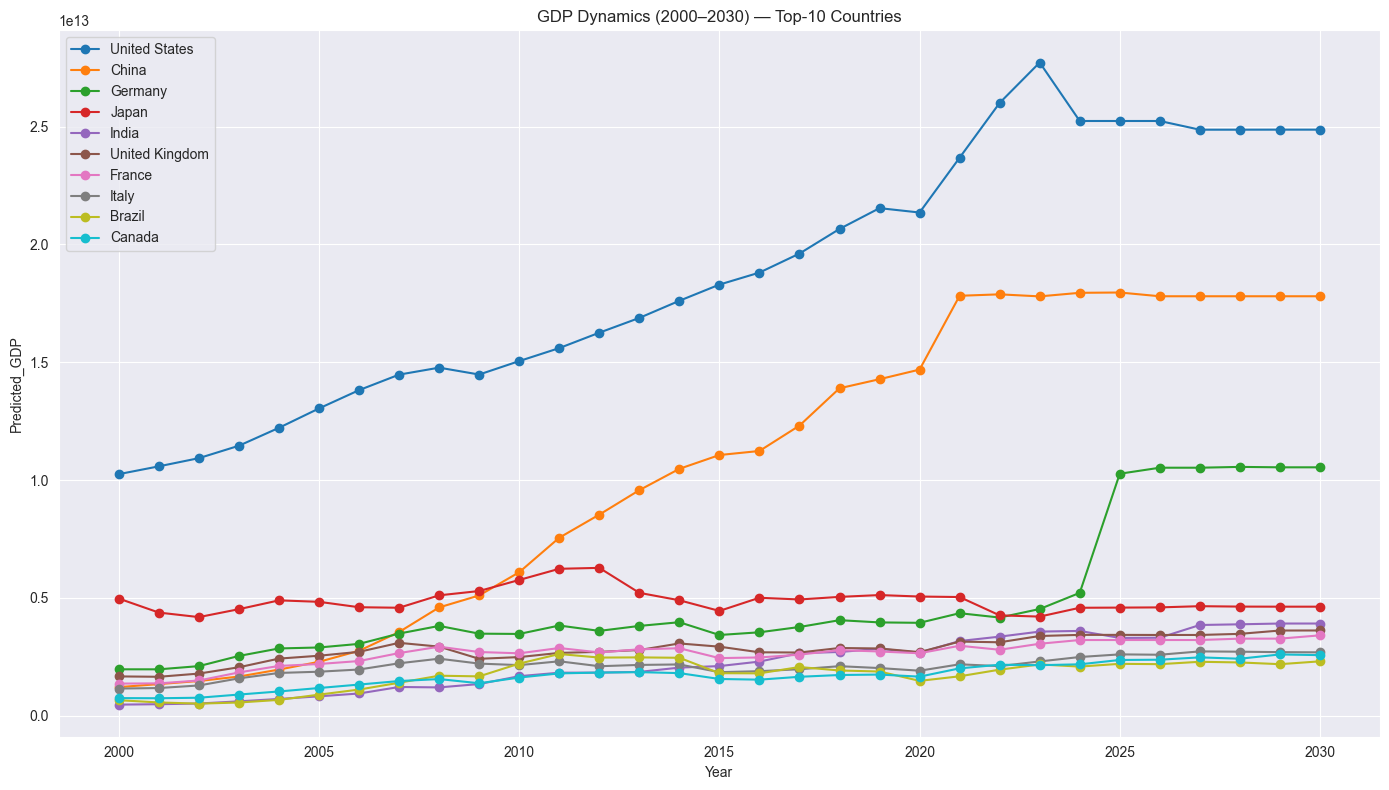

In [310]:
import matplotlib.pyplot as plt

last_real_year = full_results[full_results['Year'] <= 2023]['Year'].max()
top10 = (
    full_results[full_results['Year'] == last_real_year]
    .sort_values('Predicted_GDP', ascending=False)
    .head(10)['Country']
    .tolist()
)

# 2. Визуализация динамики GDP по годам
plt.figure(figsize=(14, 8))
for country in top10:
    data = full_results[full_results['Country'] == country].sort_values('Year')
    plt.plot(data['Year'], data['Predicted_GDP'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Predicted_GDP')
plt.title('GDP Dynamics (2000–2030) — Top-10 Countries')
plt.legend()
plt.tight_layout()
plt.show()


Comparison with IMF

In [311]:
import pandas as pd

# 1. Чтение файла
imf_raw = pd.read_csv('imf2.csv')
# Унификация China и Taiwan
imf_raw['Country'] = imf_raw['Country'].replace({
    "China, People's Republic of": 'China',
    "Taiwan Province of China": 'Taiwan'
})


In [285]:
imf_raw

,Country,Year,IMF_GDP
0,Afghanistan,2024,NaN
1,Albania,2024,27.259
2,Algeria,2024,264.913
3,Andorra,2024,4.038
4,Angola,2024,115.946
...,...,...,...
1367,Vietnam,2030,666.539
1368,West Bank and Gaza,2030,NaN
1369,Yemen,2030,25.717
1370,Zambia,2030,50.669


In [312]:

gdp_countries = set(df['Country'].unique())
imf_countries = set(imf_raw['Country'].unique())

# Какие страны из IMF не совпадают по названию с GDP
imf_not_in_gdp = [c for c in imf_countries if c not in gdp_countries]
gdp_not_in_imf = [c for c in gdp_countries if c not in imf_countries]

print('Несовпадающие страны в IMF:', imf_not_in_gdp)
print('Несовпадающие страны в GDP:', gdp_not_in_imf)

Несовпадающие страны в IMF: ['Palau', 'Gambia, The', 'Grenada', 'West Bank and Gaza', 'Egypt', 'Saint Lucia', 'Puerto Rico', 'North Macedonia ', 'Czech Republic', 'Dominica', 'Yemen', 'Turkmenistan', 'Kyrgyz Republic', 'Trinidad and Tobago', 'Switzerland', 'Myanmar', 'Barbados', 'Antigua and Barbuda', 'Nigeria', 'Malawi', 'Marshall Islands', 'Macao SAR', 'Tanzania', 'Kosovo', 'S�o Tom� and Pr�ncipe', 'Taiwan', "C�te d'Ivoire", 'Lao P.D.R.', 'Bolivia', 'Eritrea', 'Argentina', 'Venezuela', 'Vietnam', 'Andorra', 'Moldova', 'Tuvalu', 'T�rkiye, Republic of', 'Montenegro', 'San Marino', 'Syria', 'Liberia', 'Nauru', 'Aruba', 'Congo, Republic of ', 'Kiribati', 'Slovak Republic', 'Somalia', 'Saint Vincent and the Grenadines', 'Hong Kong SAR', 'Eswatini', 'South Sudan, Republic of', 'Micronesia, Fed. States of', 'Iran', 'Saint Kitts and Nevis', 'Seychelles', 'Timor-Leste', 'Congo, Dem. Rep. of the', 'Korea, Republic of', 'Bahamas, The']
Несовпадающие страны в GDP: ['North Macedonia', 'Viet Nam',

In [313]:
imf_raw['Country'] = imf_raw['Country'].replace({
    "Slovak Republic": "Slovakia",
    "Bahamas, The": "Bahamas",
    "Congo, Dem. Rep. of the": "Congo, Democratic Republic of the",
    "Kyrgyz Republic": "Kyrgyzstan",
    "South Sudan, Republic of": "South Sudan",
    "Hong Kong SAR": "Hong Kong",
    "Saint Lucia": "St. Lucia",
    "Saint Vincent and the Grenadines": "St. Vincent and the Grenadines",
    "Saint Kitts and Nevis": "St. Kitts and Nevis",
    "Korea, Republic of": "South Korea",
    "Macao SAR": "Macau",
    "Czech Republic": "Czechia",
    "Venezuela": "Venezuela, RB",
    "Tanzania": "Tanzania",
    "Vietnam": "Viet Nam",
    "T�rkiye, Republic of": "Turkey",
    "Congo, Republic of ": "Congo, Rep.",
    "Micronesia, Fed. States of": "Micronesia, Fed. Sts.",
    "Taiwan": "Taiwan, China",
    "Bolivia": "Bolivia",
    "Iran": "Iran, Islamic Rep.",
    "Lao P.D.R.": "Lao PDR",
    "Yemen": "Yemen, Rep.",
    "Kosovo": "Kosovo",
    "West Bank and Gaza": "West Bank and Gaza",
    "Syria": "Syrian Arab Republic",
    "Egypt": "Egypt, Arab Rep.",
    "S�o Tom� and Pr�ncipe": "Sao Tome and Principe",
    "Gambia, The": "Gambia, The",
    "North Macedonia ": "North Macedonia",
    "C�te d'Ivoire": "Cote d'Ivoire",
})


In [314]:
# full_results['Predicted_GDP'] — в долларах, имф — в миллиардах
compare = pd.merge(
    full_results[['Country', 'Year', 'Predicted_GDP']],
    imf_raw,  # тут 'IMF_GDP' уже в миллиардах!
    on=['Country', 'Year'],
    how='inner'
)

# Переводим Predicted_GDP в миллиарды
compare['Predicted_GDP_B'] = compare['Predicted_GDP'] / 1_000_000_000

# Теперь можно сравнивать Predicted_GDP_B и IMF_GDP напрямую
print(compare.head())


       Country  Year  Predicted_GDP  IMF_GDP  Predicted_GDP_B
0  Afghanistan  2024   4.787864e+10      NaN        47.878638
1  Afghanistan  2025   4.932769e+10      NaN        49.327688
2  Afghanistan  2026   5.364882e+10      NaN        53.648817
3  Afghanistan  2027   4.947108e+10      NaN        49.471084
4  Afghanistan  2028   4.947108e+10      NaN        49.471084


In [289]:
print(imf_raw[(imf_raw['Country'].str.contains('China')) & (imf_raw['Year'] == 2030)])

            Country  Year    IMF_GDP
1212          China  2030  25827.523
1346  Taiwan, China  2030    960.132


In [315]:
compare

,Country,Year,Predicted_GDP,IMF_GDP,Predicted_GDP_B
0,Afghanistan,2024,4.787864e+10,NaN,47.878638
1,Afghanistan,2025,4.932769e+10,NaN,49.327688
2,Afghanistan,2026,5.364882e+10,NaN,53.648817
3,Afghanistan,2027,4.947108e+10,NaN,49.471084
4,Afghanistan,2028,4.947108e+10,NaN,49.471084
...,...,...,...,...,...
982,Zimbabwe,2026,2.805637e+10,39.491,28.056368
983,Zimbabwe,2027,2.805637e+10,40.925,28.056368
984,Zimbabwe,2028,3.331918e+10,42.340,33.319184
985,Zimbabwe,2029,3.482476e+10,43.836,34.824755


In [316]:
top3 = (
    compare[compare['Year'] >= 2024]
    .groupby('Country')['Predicted_GDP']
    .mean()
    .sort_values(ascending=False)
    .head(3)
    .index
    .tolist()
)
print(top3)


['United States', 'China', 'Germany']


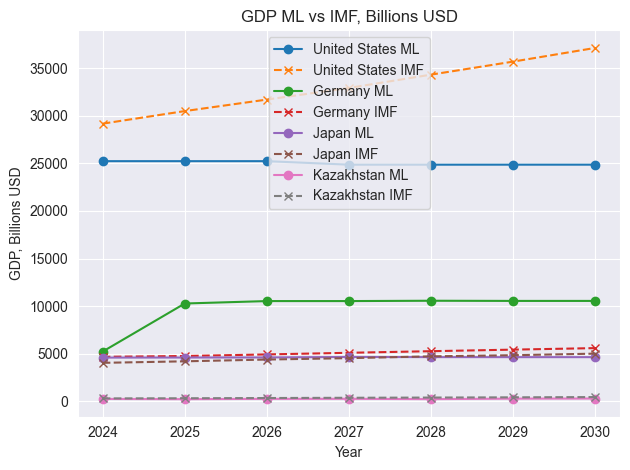

In [317]:
import matplotlib.pyplot as plt

for country in ['United States', 'Germany', 'Japan','Kazakhstan']:
    c = compare[compare['Country'] == country]
    plt.plot(c['Year'], c['Predicted_GDP_B'], marker='o', label=f'{country} ML')
    plt.plot(c['Year'], c['IMF_GDP'], marker='x', linestyle='--', label=f'{country} IMF')

plt.xlabel('Year')
plt.ylabel('GDP, Billions USD')
plt.title('GDP ML vs IMF, Billions USD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


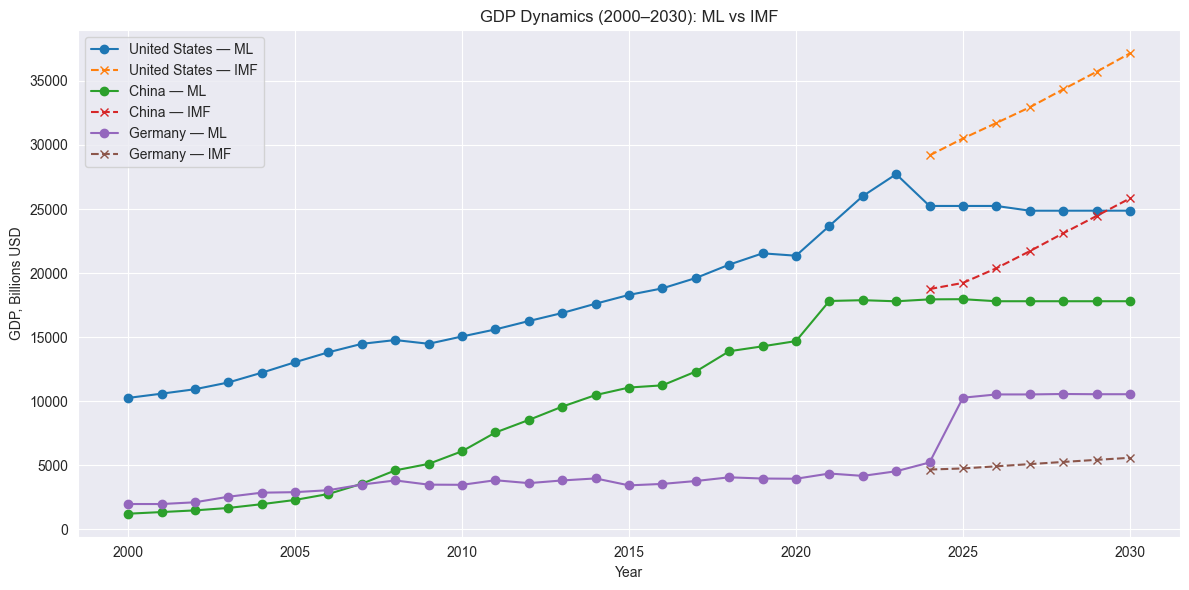

In [318]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for country in top3:
    # ML-модель: 2000–2030
    c_ml = full_results[(full_results['Country'] == country) & (full_results['Year'] >= 2000)]
    plt.plot(
        c_ml['Year'],
        c_ml['Predicted_GDP'] / 1_000_000_000,  # в миллиардах
        label=f'{country} — ML',
        marker='o'
    )

    # IMF: только 2024–2030
    c_imf = imf_raw[(imf_raw['Country'] == country) & (imf_raw['Year'] >= 2024)]
    plt.plot(
        c_imf['Year'],
        c_imf['IMF_GDP'],  # ВНИМАНИЕ: без деления! Уже в миллиардах!
        label=f'{country} — IMF',
        marker='x',
        linestyle='--'
    )

plt.xlabel('Year')
plt.ylabel('GDP, Billions USD')
plt.title('GDP Dynamics (2000–2030): ML vs IMF')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Comparison of the ML model forecast and the official IMF forecast revealed significant differences in the dynamics of GDP growth for a number of countries. The machine learning model builds a forecast based solely on historical relationships of macroeconomic indicators and does not use expert assumptions about future development. In contrast, the IMF forecast takes into account possible structural changes, political decisions, and scenario assumptions. This comparison allows us to assess the strength and limitations of the data-driven approach, as well as emphasize the importance of expert forecasts for medium- and long-term planning.

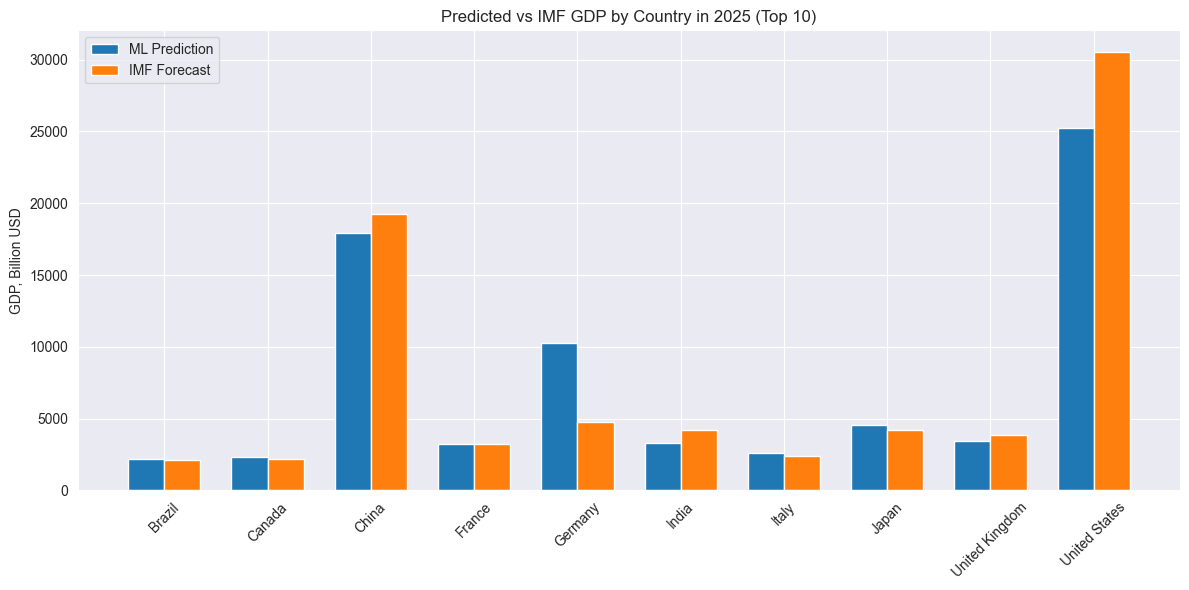

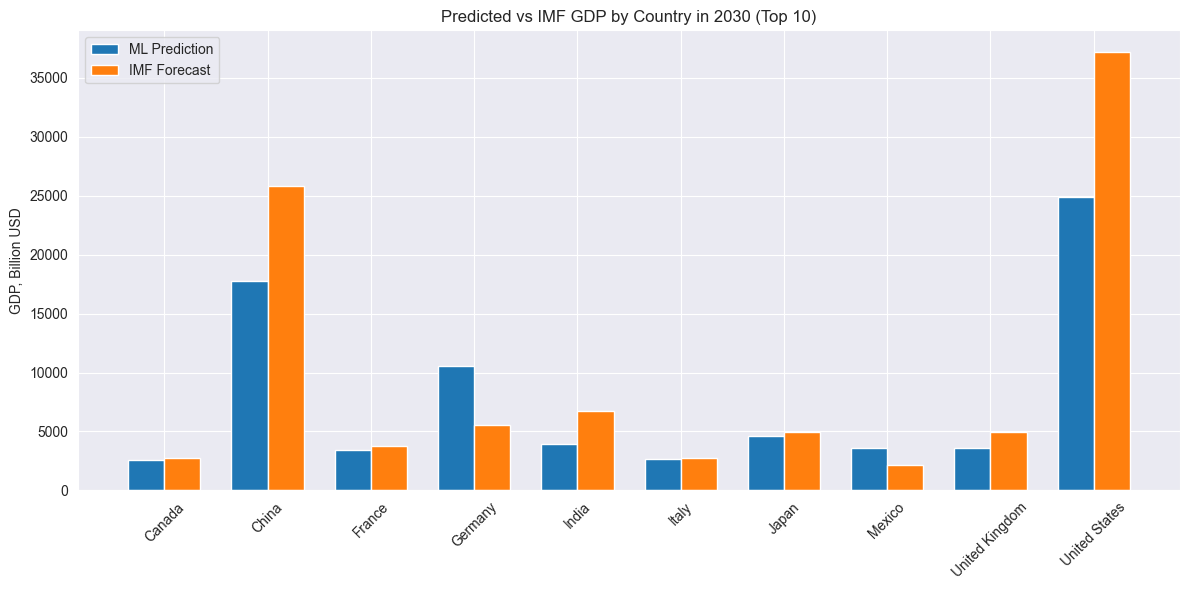

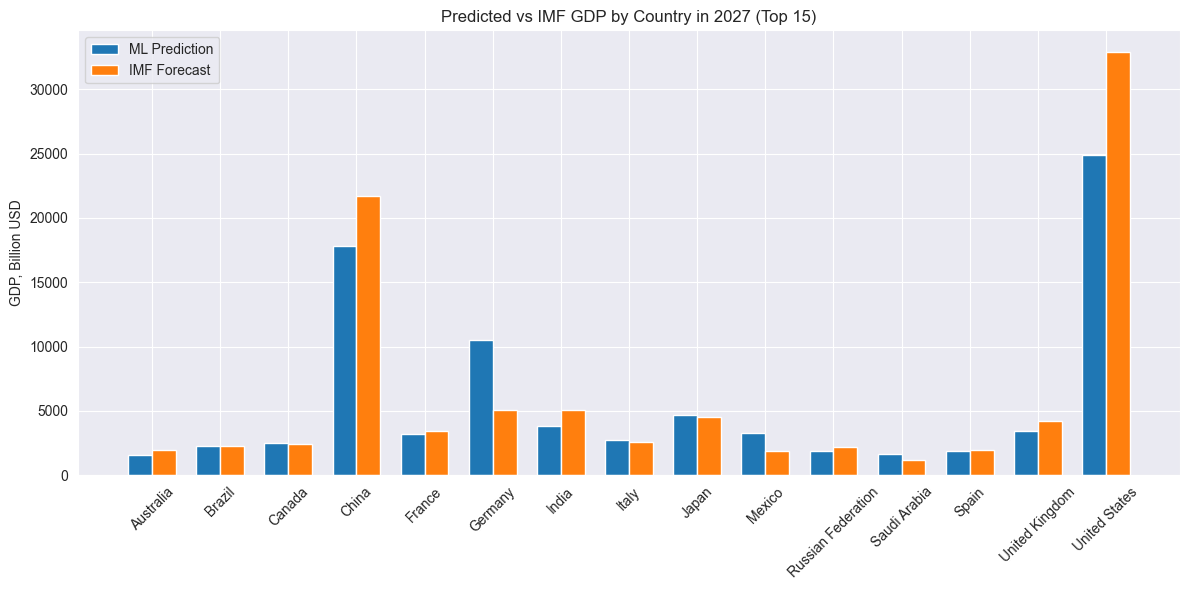

In [319]:
import matplotlib.pyplot as plt

# Готовим DataFrame для сравнения (например, full_results и imf_raw у тебя уже есть)
def plot_pred_vs_imf_bar(year, top_n=10):
    # 1. Собираем GDP по моделям
    df_pred = full_results[full_results['Year'] == year][['Country', 'Predicted_GDP']].copy()
    df_pred['Predicted_GDP'] = df_pred['Predicted_GDP'] / 1_000_000_000  # млрд USD

    df_imf = imf_raw[imf_raw['Year'] == year][['Country', 'IMF_GDP']].copy()  # уже в млрд USD

    # 2. Merge
    compare = pd.merge(df_pred, df_imf, on='Country')

    # 3. Top-10 стран по Predicted_GDP (можно по IMF_GDP — как тебе удобнее)
    top_countries = compare.sort_values('Predicted_GDP', ascending=False).head(top_n)['Country']
    compare = compare[compare['Country'].isin(top_countries)]

    # 4. Построение barplot
    bar_width = 0.35
    x = range(len(compare))
    plt.figure(figsize=(12,6))
    plt.bar(x, compare['Predicted_GDP'], width=bar_width, label='ML Prediction')
    plt.bar([i + bar_width for i in x], compare['IMF_GDP'], width=bar_width, label='IMF Forecast')
    plt.xticks([i + bar_width/2 for i in x], compare['Country'], rotation=45)
    plt.ylabel('GDP, Billion USD')
    plt.title(f'Predicted vs IMF GDP by Country in {year} (Top {top_n})')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Пример вызова для 2025:
plot_pred_vs_imf_bar(2025, top_n=10)
# Для 2030:
plot_pred_vs_imf_bar(2030, top_n=10)
plot_pred_vs_imf_bar(2027, top_n=15)

In this project, we developed a machine learning model to forecast countries’ GDP based on a wide range of macroeconomic indicators and advanced data mining techniques. The results demonstrate that ML models are capable of capturing the main trends in GDP dynamics using only historical relationships between features such as export, foreign direct investment, demographic factors, and aggregated latent variables (e.g., via PCA).

When comparing our ML-based forecasts with official IMF projections, both general similarities and significant differences were observed: while the ML model extrapolates historical patterns into the future, IMF forecasts integrate scenario-based expert assessments, structural changes, and anticipated policy shifts—often leading to divergent predictions for certain countries.

Overall, this project highlights both the strengths and limitations of the data-driven approach in macroeconomic forecasting: on the one hand, ML enables high levels of automation and reproducibility; on the other hand, it cannot account for ‘surprises’ or policy decisions not present in the historical data. For real-world planning, the optimal approach is to combine machine learning models with expert and scenario-based forecasts.